# Ultimatum game with incentives to maximize an individuals payoff
**Original Study**
- Conducted by James Andreoni and Hal Varian

>Resources
- Full paper can be found here http://www.pnas.org/content/96/19/10933.full
- Attiyeh, G., Franciosi, R. & Isaac, R. M. (1999) Public Choice, in press.
- Bagnoli M, Ben-David S, McKee M(1992) J Public Econ 47:85–106.
-  Chen Y, Plott C R(1996) J Public Econ 59:335–364
- Jonathan Levin (2006) http://web.stanford.edu/~jdlevin/Econ%20286/Experimental.pdf

**Overview**
- The Ultimatum game is an extension of the classic economic thought experiment of Prisoner's Dilemma. To summarize, Prisoner's Dilemma is a situation between two people where each person has the option to defect or cooperate. The traditional example is given as follows. Imagine you were brought into a police station to be investigated for a crime. In the other room your friend is also being questioned. In your room your police officer tells you that  you have two options, defect and tell the officers that your friend commited the crime or cooperate with your friend and do no tell the police anything. Your friend also has these options. The nash equilibirum (best outcome for both parties) is for both parties to stay silent (cooperate), while the dominant strategy for each individual player is to defect (tell the police what happened). 
- Even with the nash equlibirum evident, studies have shown that subjects rarely reach nash equilibirum. Studies shows nash equilibrium reached 10% (Attiyeh et al.), around 20% ( Chen and Plott), and 54% (Bagnoli and McKee) of the time.

> Prionser's Dilemma outlined below

![alt text](prisoners_dilemma.jpg "Title")

**Ultimatum Game**
- This study expanded upon the traditional prisoner's dilemma by first training subjects on a variant of prisoner's dilemma called the ultimatum game. A brief overview of this game is as follows. Imagine you are sitting across the table from another person. In the middle of you is a pot of money. Each person is labeled of either Proposer or Responder. The Proposer can choose how to split the pot of money, while the Responder can decide whether to accept this split or reject this split. If the Responder accepts the split, both subjects receive money; however, if the Responder rejects the split than neither party receives any money.
- In this game, offers are rejected about 15-20% of the time (Levin).

![alt text](results_of_ultimatum.png "Title")


** Alternative to the game used in this study and dataset **
- This experiment used two stages; the first was a variant of the ultimatum game where players choose whether to push (give money) or pull(take money) simultaneously from a pot. Typically this would involve pushing $6-$7 to the other player, or pulling $3-$4 for yourself. The next section of this game had two stages. The first stage allowed each player to send some money to the other player in the hope that they would push money back to themselves. After, each player saw the amount the other player sent them. Then, each player would choose to push money to the opposite player or pull money for themself. If a player in this second game pushed money to the other player, they would receive the side payment. However, if a player did not push money to the opposite player, the side payment would be returned to the original player. (The side payment here was used as an incentive for players to push money to the opposite player).

- Below is the screen the subjects saw when performing this study.
![alt text](game_setup.png "Title")

** Analysis**
- This project will used several machine learning techniques to see,
    - 1) How to maximize your own payoff (versus total payout) throught the different rounds of play
    - 2) Which variables are the most important to maximize your payoff (versus total payoff)
    - 3) Test the effectiveness of different algorithms to answer the questions above.
- This is a supervised regression machine learning problem 
- The number of splits for training and testing is determined by the user ( 3 was used below). The trainval split is used to create new train and validate splits. The train split is used to build the model, the validate is used to test the model, and this process is repeated from the initial split of trainval. Finally, the test split is used to evaluate the model (but this data is never used to build the model).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from model_testing import Model_Testing_Regression
%pylab inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from model_testing import Model_Testing_Regression
from  sklearn.ensemble import GradientBoostingRegressor
%load_ext autoreload
import xgboost
from scipy.spatial.distance import euclidean
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.externals import joblib

Populating the interactive namespace from numpy and matplotlib


# EDA on the data

In [3]:
cols = 'expernum,rd,time,sub,oppnt,myside,opptside,mypush,mypull,\
opptpush,opptpull,mychoice,opptchoice,mychoicecard,opptchoicecard,mypayoff,opptpayoff,totalpayoff'.split(',')

In [4]:
ultimatum_df = pd.read_table('preplay_data.txt',names=cols)

In [5]:
ultimatum_df.head()

,expernum,rd,time,sub,oppnt,myside,opptside,mypush,mypull,opptpush,opptpull,mychoice,opptchoice,mychoicecard,opptchoicecard,mypayoff,opptpayoff,totalpayoff
0,1,1,23,1,6,0,0,6,4,7,3,0,1,4,7,11,0,11
1,1,1,26,6,1,0,0,7,3,6,4,1,0,7,4,0,11,11
2,1,1,30,4,7,0,0,6,4,7,3,0,0,4,3,4,3,7
3,1,1,35,7,4,0,0,7,3,6,4,0,0,3,4,3,4,7
4,1,1,38,5,2,0,0,7,3,6,4,1,1,7,6,6,7,13


In [6]:
new_cols = 'expernum,rd,myside,opptside,mypush,mypull,\
opptpush,opptpull,mychoice,mychoicecard,mypayoff,opptpayoff,totalpayoff'.split(',')

- Remove the columns that are not meaningful for this analysis andthe  columns that you would not see as a subject.
    - Sub (subject number)
    - oppnt (oppnt number)
    - time
    - opptchoice
    - opptchoice card

  

In [7]:
ultimatum_df = ultimatum_df.loc[:,new_cols]


In [8]:
ultimatum_df.head()

,expernum,rd,myside,opptside,mypush,mypull,opptpush,opptpull,mychoice,mychoicecard,mypayoff,opptpayoff,totalpayoff
0,1,1,0,0,6,4,7,3,0,4,11,0,11
1,1,1,0,0,7,3,6,4,1,7,0,11,11
2,1,1,0,0,6,4,7,3,0,4,4,3,7
3,1,1,0,0,7,3,6,4,0,3,3,4,7
4,1,1,0,0,7,3,6,4,1,7,6,7,13


In [9]:
ultimatum_df.describe()

,expernum,rd,myside,opptside,mypush,mypull,opptpush,opptpull,mychoice,mychoicecard,mypayoff,opptpayoff,totalpayoff
count,1920.00000,1920.000000,1920.000000,1920.000000,1920.00000,1920.00000,1920.00000,1920.00000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,3.50000,20.500000,2.093229,2.093229,6.50000,3.50000,6.50000,3.50000,0.412500,4.816667,4.816667,4.816667,9.633333
std,1.70827,11.546404,2.027728,2.027728,0.50013,0.50013,0.50013,0.50013,0.492412,1.570883,2.584221,2.584221,2.247559
min,1.00000,1.000000,0.000000,0.000000,6.00000,3.00000,6.00000,3.00000,0.000000,3.000000,0.000000,0.000000,7.000000
25%,2.00000,10.750000,0.000000,0.000000,6.00000,3.00000,6.00000,3.00000,0.000000,3.000000,3.000000,3.000000,7.000000
50%,3.50000,20.500000,2.000000,2.000000,6.50000,3.50000,6.50000,3.50000,0.000000,4.000000,4.000000,4.000000,9.000000
75%,5.00000,30.250000,4.000000,4.000000,7.00000,4.00000,7.00000,4.00000,1.000000,6.000000,7.000000,7.000000,11.000000
max,6.00000,40.000000,10.000000,10.000000,7.00000,4.00000,7.00000,4.00000,1.000000,7.000000,13.000000,13.000000,13.000000


In [10]:
ultimatum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 13 columns):
expernum        1920 non-null int64
rd              1920 non-null int64
myside          1920 non-null int64
opptside        1920 non-null int64
mypush          1920 non-null int64
mypull          1920 non-null int64
opptpush        1920 non-null int64
opptpull        1920 non-null int64
mychoice        1920 non-null int64
mychoicecard    1920 non-null int64
mypayoff        1920 non-null int64
opptpayoff      1920 non-null int64
totalpayoff     1920 non-null int64
dtypes: int64(13)
memory usage: 195.1 KB


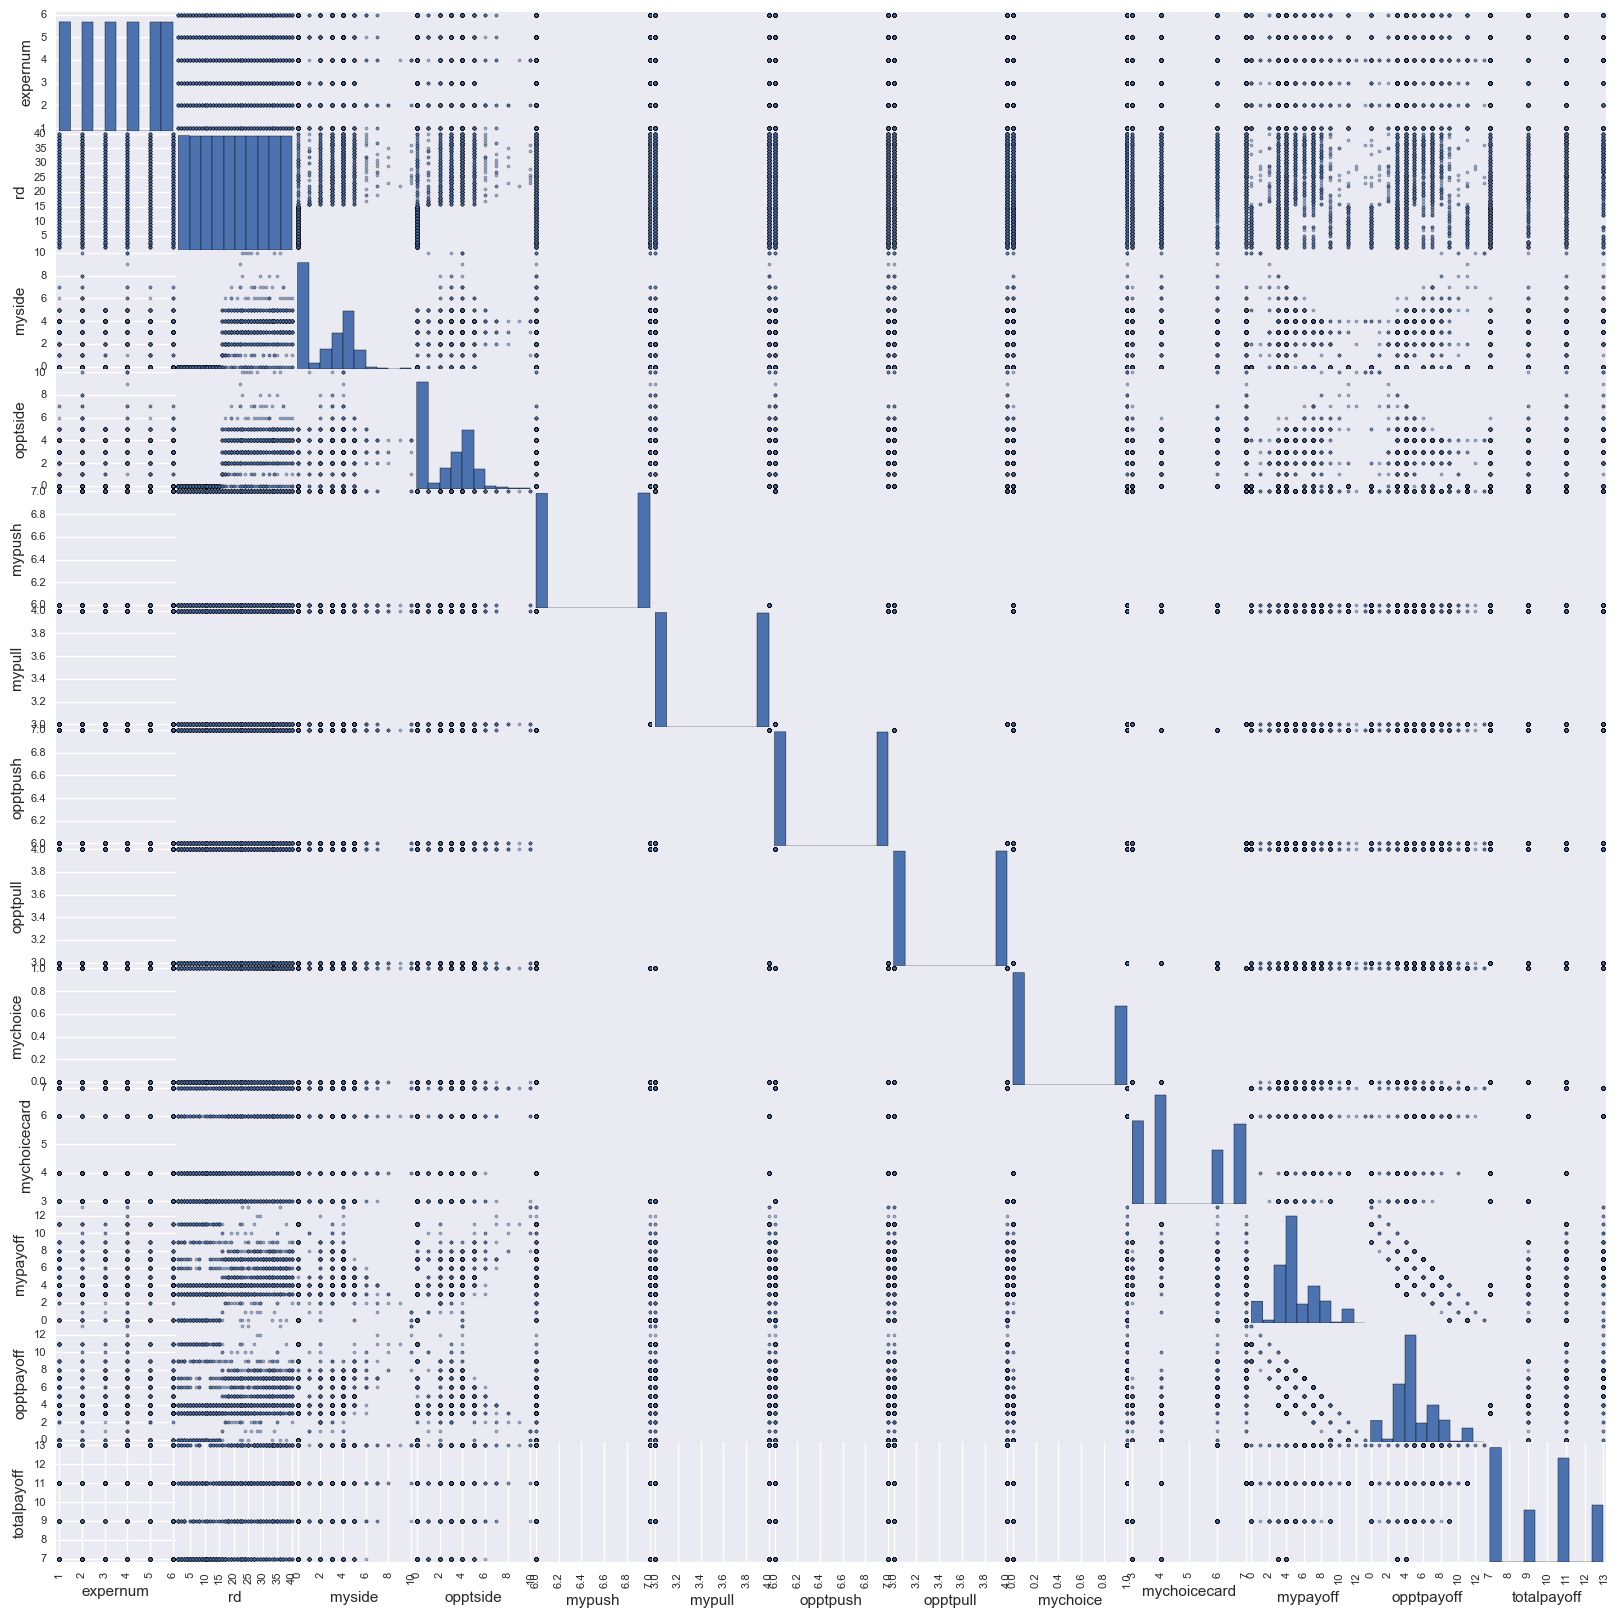

In [11]:
pd.scatter_matrix(ultimatum_df,figsize=(20,20));

- There seems to be a relationship between the side payments, and the payoffs between players as well as my payoff and oppnt payoff.

### Create partions for different groups 
- rd 1-15 did not involve the option of a side payment
- rds past 15 did offer the options for a side payment

In [12]:
ultimatum_rd15_df = ultimatum_df[(ultimatum_df.rd <=15)]

ultimatum_pastrd15_df = ultimatum_df[(ultimatum_df.rd >15)]

In [13]:
ultimatum_rd15_df.head()

,expernum,rd,myside,opptside,mypush,mypull,opptpush,opptpull,mychoice,mychoicecard,mypayoff,opptpayoff,totalpayoff
0,1,1,0,0,6,4,7,3,0,4,11,0,11
1,1,1,0,0,7,3,6,4,1,7,0,11,11
2,1,1,0,0,6,4,7,3,0,4,4,3,7
3,1,1,0,0,7,3,6,4,0,3,3,4,7
4,1,1,0,0,7,3,6,4,1,7,6,7,13


In [14]:
ultimatum_rd15_df.describe()

,expernum,rd,myside,opptside,mypush,mypull,opptpush,opptpull,mychoice,mychoicecard,mypayoff,opptpayoff,totalpayoff
count,720.000000,720.000000,720.0,720.0,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,3.500000,8.000000,0.0,0.0,6.500000,3.500000,6.500000,3.500000,0.258333,4.341667,4.341667,4.341667,8.683333
std,1.709012,4.323497,0.0,0.0,0.500348,0.500348,0.500348,0.500348,0.438022,1.438566,3.363047,3.363047,2.072336
min,1.000000,1.000000,0.0,0.0,6.000000,3.000000,6.000000,3.000000,0.000000,3.000000,0.000000,0.000000,7.000000
25%,2.000000,4.000000,0.0,0.0,6.000000,3.000000,6.000000,3.000000,0.000000,3.000000,3.000000,3.000000,7.000000
50%,3.500000,8.000000,0.0,0.0,6.500000,3.500000,6.500000,3.500000,0.000000,4.000000,4.000000,4.000000,7.000000
75%,5.000000,12.000000,0.0,0.0,7.000000,4.000000,7.000000,4.000000,1.000000,6.000000,6.000000,6.000000,11.000000
max,6.000000,15.000000,0.0,0.0,7.000000,4.000000,7.000000,4.000000,1.000000,7.000000,11.000000,11.000000,13.000000


- Now drop, expernum

In [15]:
ultimatum_rd15_df = ultimatum_rd15_df.iloc[:,1:]
ultimatum_pastrd15_df = ultimatum_pastrd15_df.iloc[:,1:]
# drop for entire data set as well
ultimatum_df = ultimatum_df.iloc[:,1:]

In [16]:
ultimatum_rd15_df.head()

,rd,myside,opptside,mypush,mypull,opptpush,opptpull,mychoice,mychoicecard,mypayoff,opptpayoff,totalpayoff
0,1,0,0,6,4,7,3,0,4,11,0,11
1,1,0,0,7,3,6,4,1,7,0,11,11
2,1,0,0,6,4,7,3,0,4,4,3,7
3,1,0,0,7,3,6,4,0,3,3,4,7
4,1,0,0,7,3,6,4,1,7,6,7,13


In [17]:
ultimatum_pastrd15_df.tail()

,rd,myside,opptside,mypush,mypull,opptpush,opptpull,mychoice,mychoicecard,mypayoff,opptpayoff,totalpayoff
1915,40,4,3,6,4,7,3,0,4,7,4,11
1916,40,3,5,6,4,7,3,1,6,9,4,13
1917,40,1,4,6,4,7,3,1,6,4,5,9
1918,40,3,4,7,3,6,4,1,7,4,7,11
1919,40,4,1,7,3,6,4,0,3,5,4,9


In [18]:
ultimatum_rd15_df.columns

Index(['rd', 'myside', 'opptside', 'mypush', 'mypull', 'opptpush', 'opptpull',
       'mychoice', 'mychoicecard', 'mypayoff', 'opptpayoff', 'totalpayoff'],
      dtype='object')

## There are three groups  to test.
    - 1) Maximize your own payoff for rd 1-15
    - 2) Maximize your own payoff for rds past 15
    - 3) Maximize your own payoff for all rounds
    
> For the first 15 rounds, I will go through a manual grid search process to show how to find parameters finishing with a randomized grid search via Sklearn to confirm or reject the parameters I found. Then for all other groups of data, I will look at the default values as well as the optimal grid searched values (in the interest of time).

## Data partions
- Manual gridsearch starts below. If you want to see the best models, skip to the final randomized gridsearch section.

In [19]:
##############Partioned data s et (rd 1-15) past rd 15)################
#Group one-maximize your payoff
ultimatum_rd15_df_mypayoff_X = np.array(ultimatum_rd15_df.iloc[:,:9])
ultimatum_rd15_df_mypayoff_y = np.array(ultimatum_rd15_df.iloc[:,9])


##scaled data for elastic net/glmnet rd -115
scale_1 = StandardScaler()
ultimatum_rd15_df_mypayoff_X_scaled =scale_1.fit_transform(ultimatum_rd15_df_mypayoff_X)



## past round 15
ultimatum_pastrd15_df_mypayoff_X = np.array(ultimatum_pastrd15_df.iloc[:,:9])
ultimatum_pastrd15_df_mypayoff_y = np.array(ultimatum_pastrd15_df.iloc[:,9])


## scale the data for elastic net/glmnet rd past 15
scale = StandardScaler()
ultimatum_pastrd15_df_mypayoff_X_scaled =scale.fit_transform(ultimatum_pastrd15_df_mypayoff_X)



#### Labels####
ultimatum_Xlabels = np.array(['rd', 'myside', 'opptside', 'mypush', 'mypull', 'opptpush', 'opptpull',\
       'mychoice', 'mychoicecard'])
ultimatum_ylabels = np.array(['mypayoff'])



############Total data set ##############

ultimatum_total_df_mypayoff_X = np.array(ultimatum_df.iloc[:,:9])
ultimatum_total_df_mypayoff_y = np.array(ultimatum_df.iloc[:,9])


##scaled data

scale_2 = StandardScaler()
ultimatum_total_df_mypayoff_X_scaled =scale_2.fit_transform(ultimatum_total_df_mypayoff_X)



/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [18]:
ultimatum_rd15_df.iloc[:,:9].head(2)

,rd,myside,opptside,mypush,mypull,opptpush,opptpull,mychoice,mychoicecard
0,1,0,0,6,4,7,3,0,4
1,1,0,0,7,3,6,4,1,7


In [19]:
ultimatum_pastrd15_df.iloc[:,:9].head(2)

,rd,myside,opptside,mypush,mypull,opptpush,opptpull,mychoice,mychoicecard
120,16,1,2,7,3,6,4,0,3
121,16,0,1,6,4,7,3,0,4


## Random Forest to predict your payoff for the first 15 rounds

In [20]:
#How much data do we have?
np.shape(ultimatum_rd15_df_mypayoff_X )

(720, 9)

In [21]:
#Not that much data...something to be aware of

In [273]:
regression_model_15_mypayoff= \
Model_Testing_Regression(ultimatum_rd15_df_mypayoff_X ,ultimatum_rd15_df_mypayoff_y,3,ultimatum_Xlabels,ultimatum_ylabels )

In [274]:
#default
regression_model_15_mypayoff.random_forest(100,'auto',None)

('RMSE Val:',
 3.0863388803928031,
 'RMSE Train:',
 2.6916522994269148,
 'RMSE TEST:',
 2.8646190575236372,
 [('rd', 0.36245554392480345),
  ('mychoicecard', 0.26019724124239263),
  ('mychoice', 0.21256756082280115),
  ('opptpull', 0.044895951531867186),
  ('mypush', 0.041356718710467262),
  ('opptpush', 0.040061603685318366),
  ('mypull', 0.038465380082349961),
  ('opptside', 0.0),
  ('myside', 0.0)])

- Plot out the progression of RF as we add more trees.

In [24]:
txt_v_rf,rmse_val_rf,txt_tr_rf,rmse_train_rf,txt_test_rf,rmse_test_rf,features_rf= zip(*[regression_model_15_mypayoff.random_forest(i,'auto',None) for i in range(1,700,25)])

Min RMSE for validation set: 2.822382605386675, 3 folds cv
Min RMSE for train set: 2.588596453048952, 3 folds cs
Min RMSE for test set: 3.1090776793276054, 3 folds cv


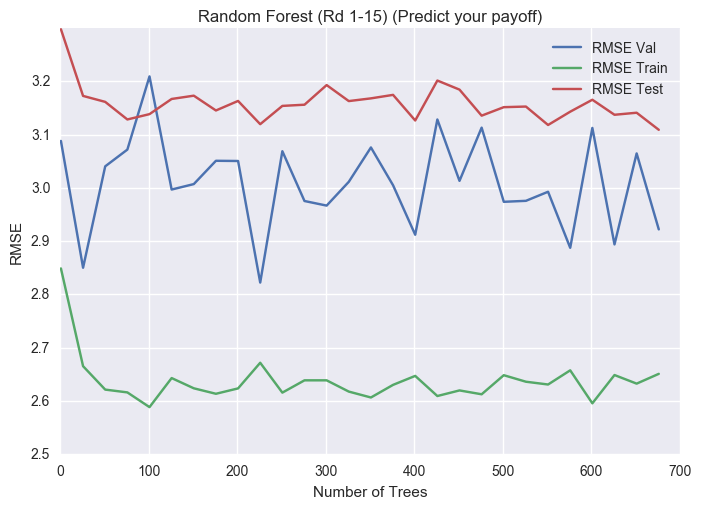

In [25]:
plt.plot([i for i in range(1,700,25)], rmse_val_rf,label='RMSE Val')
plt.plot([i for i in range(1,700,25)],rmse_train_rf , label='RMSE Train')
plt.plot([i for i in range(1,700,25)],rmse_test_rf, label = 'RMSE Test')
print('Min RMSE for validation set: {}, {} folds cv'.format(min(rmse_val_rf),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for train set: {}, {} folds cs'.format(min(rmse_train_rf),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for test set: {}, {} folds cv'.format(min(rmse_test_rf),regression_model_15_mypayoff.number_of_folds))
plt.legend()
plt.title('Random Forest (Rd 1-15) (Predict your payoff)')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE');

- Min cv test error at ~3.1 RMSE (units are dollars). Best parameters from min train error of ~2.58 at ~600 tree

# Final model below - Random Forest - Predict your payoff rd 1-15

In [26]:

regression_model_15_mypayoff.random_forest(600,'auto',None)

('RMSE Val:',
 2.8484855895702204,
 'RMSE Train:',
 2.6623734776858119,
 'RMSE TEST:',
 3.1095462466552841,
 [('rd', 0.35858923900255962),
  ('mychoicecard', 0.28773270153036951),
  ('mychoice', 0.19411814012618334),
  ('mypush', 0.040588337363435791),
  ('mypull', 0.039875652638086796),
  ('opptpush', 0.039701592744967491),
  ('opptpull', 0.039394336594397443),
  ('opptside', 0.0),
  ('myside', 0.0)])

- It is interesting that round number is the most important feature. This means that as people learn how to play the game, the ability to predict your payoff increases.
- In addition, the number on your choice card is the second most important feature. This makes sense, the choice to push or pull is very important.

## Gradient Boosting to maximize your payoff rounds 1-15

In [27]:
#start with deafult
regression_model_15_mypayoff.gradient_boost(loss_type='ls',learning_rate_n=1.0,n_estimators_n=100,max_depth_n=3)

('RMSE Val:',
 3.287503990127131,
 'RMSE Train:',
 2.5680106743440576,
 'RMSE TEST:',
 3.1754108775790653,
 [('rd', 0.59667415031595772),
  ('mychoicecard', 0.2231170960867607),
  ('mychoice', 0.10167082569274266),
  ('mypull', 0.021138737339018217),
  ('opptpush', 0.02100390537321976),
  ('mypush', 0.018958252277269196),
  ('opptpull', 0.017437032915031851),
  ('opptside', 0.0),
  ('myside', 0.0)])

In [28]:
txt_v_gb,rmse_val_gb,txt_tr_gb,rmse_train_gb,txt_test_gb,rmse_test_gb,features_gb=\
zip(*[regression_model_15_mypayoff.gradient_boost(loss_type='ls',learning_rate_n=1.0,n_estimators_n=i,max_depth_n=1)\
      for i in range(1,1000,25)])

Min RMSE for validation set: 2.712981958530728, 3 folds cv
Min RMSE for train set: 2.7440805783749984, 3 folds cs
Min RMSE for test set: 3.016457353037263, 3 folds cv


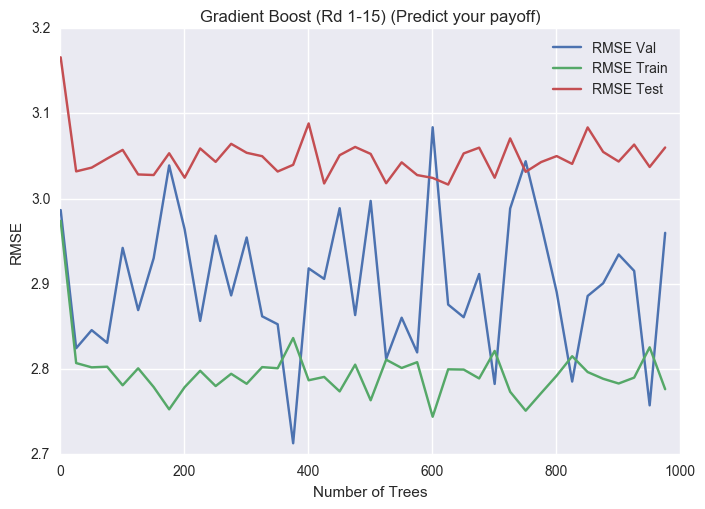

In [29]:
#plot the current model
plt.plot([i for i in range(1,1000,25)], rmse_val_gb,label='RMSE Val')
plt.plot([i for i in range(1,1000,25)],rmse_train_gb, label='RMSE Train')
plt.plot([i for i in range(1,1000,25)],rmse_test_gb, label = 'RMSE Test')
print('Min RMSE for validation set: {}, {} folds cv'.format(min(rmse_val_gb),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for train set: {}, {} folds cs'.format(min(rmse_train_gb),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for test set: {}, {} folds cv'.format(min(rmse_test_gb),regression_model_15_mypayoff.number_of_folds))
plt.legend()
plt.title('Gradient Boost (Rd 1-15) (Predict your payoff)')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE');

- Min test RMSE of ~3.0 around with best parameters coming from the min train error of ~2.8 at 700 trees for the training data. Next, repeat this with huber loss. 

In [30]:
txt_v_gb,rmse_val_gb,txt_tr_gb,rmse_train_gb,txt_test_gb,rmse_test_gb,features_gb=\
zip(*[regression_model_15_mypayoff.gradient_boost(loss_type='huber',learning_rate_n=1.0,n_estimators_n=i,max_depth_n=1)\
      for i in range(1,1000,25)])

Min RMSE for validation set: 2.7631332553105623, 3 folds cv
Min RMSE for train set: 2.781247935256969, 3 folds cs
Min RMSE for test set: 3.0080353371609605, 3 folds cv


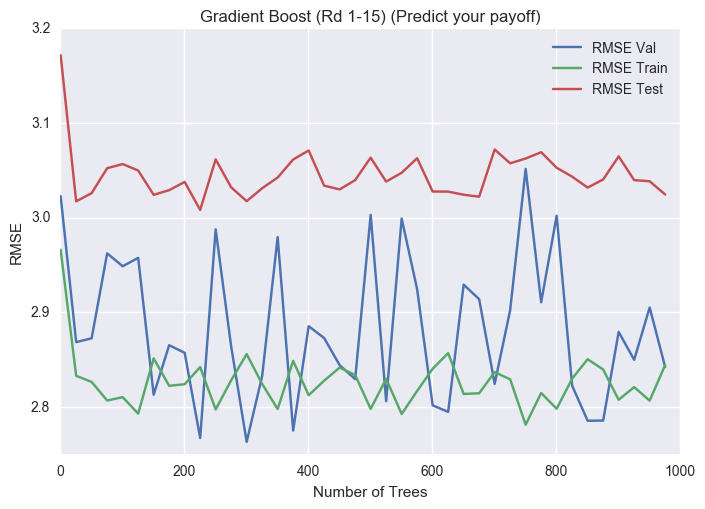

In [31]:
#plot the current model
plt.plot([i for i in range(1,1000,25)], rmse_val_gb,label='RMSE Val')
plt.plot([i for i in range(1,1000,25)],rmse_train_gb, label='RMSE Train')
plt.plot([i for i in range(1,1000,25)],rmse_test_gb, label = 'RMSE Test')
print('Min RMSE for validation set: {}, {} folds cv'.format(min(rmse_val_gb),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for train set: {}, {} folds cs'.format(min(rmse_train_gb),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for test set: {}, {} folds cv'.format(min(rmse_test_gb),regression_model_15_mypayoff.number_of_folds))
plt.legend()
plt.title('Gradient Boost (Rd 1-15) (Predict your payoff)')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE');

- Min cv test RMSE about the same at ~3.0 for test. Best parameters from cv train RMSE comes from 225 tress and huber loss. Next, attempt to optimize the learning rate with 225 trees and huber loss.

In [32]:
txt_v_gb,rmse_val_gb,txt_tr_gb,rmse_train_gb,txt_test_gb,rmse_test_gb,features_gb=\
zip(*[regression_model_15_mypayoff.gradient_boost(loss_type='huber',learning_rate_n=i,n_estimators_n=225,max_depth_n=1)\
      for i in np.linspace(.00001,2,20)])

Min RMSE for validation set: 2.5885416570152686, 3 folds cv
Min RMSE for train set: 2.7958023913563053, 3 folds cs
Min RMSE for test set: 3.0104689735514722, 3 folds cv


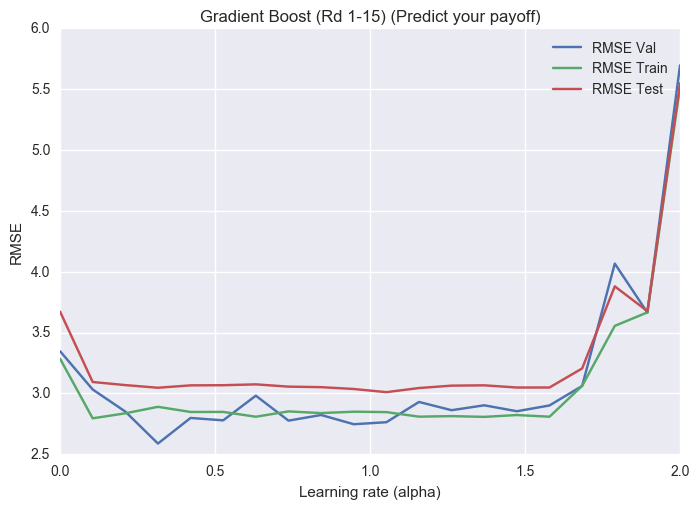

In [33]:
#plot the current model
plt.plot([i for i in np.linspace(.00001,2,20)], rmse_val_gb,label='RMSE Val')
plt.plot([i for i in np.linspace(.00001,2,20)],rmse_train_gb, label='RMSE Train')
plt.plot([i for i in np.linspace(.00001,2,20)],rmse_test_gb, label = 'RMSE Test')
print('Min RMSE for validation set: {}, {} folds cv'.format(min(rmse_val_gb),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for train set: {}, {} folds cs'.format(min(rmse_train_gb),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for test set: {}, {} folds cv'.format(min(rmse_test_gb),regression_model_15_mypayoff.number_of_folds))
plt.legend()
plt.title('Gradient Boost (Rd 1-15) (Predict your payoff)')
plt.xlabel('Learning rate (alpha)')
plt.ylabel('RMSE');

- Min cv test RMSE about the same at ~3.0 for training data. Best parameter of .9 for learning rate from cv train RMSE at 2.98. Next, max_depth with learning rate .9, 225 trees, and huber loss.

In [34]:
txt_v_gb,rmse_val_gb,txt_tr_gb,rmse_train_gb,txt_test_gb,rmse_test_gb,features_gb=\
zip(*[regression_model_15_mypayoff.gradient_boost(loss_type='huber',learning_rate_n=.9,n_estimators_n=225,max_depth_n=i)\
      for i in range(1,10)])

Min RMSE for validation set: 2.8505143286457106, 3 folds cv
Min RMSE for train set: 2.6288449717309255, 3 folds cs
Min RMSE for test set: 3.0682934288638424, 3 folds cv


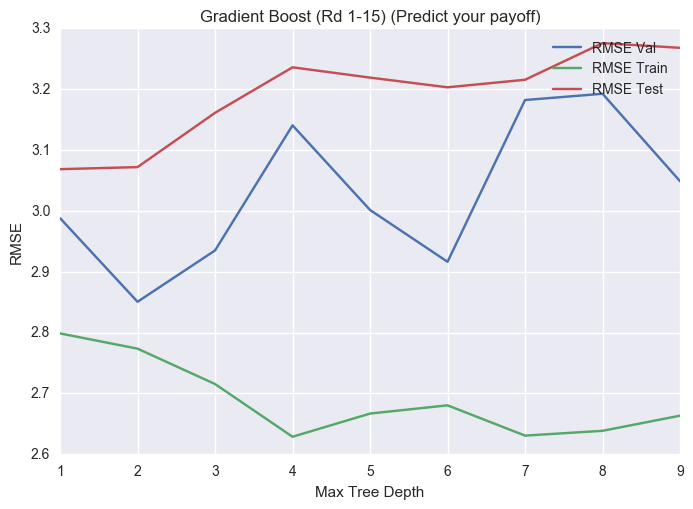

In [35]:
#plot the current model
plt.plot([i for i in range(1,10)], rmse_val_gb,label='RMSE Val')
plt.plot([i for i in range(1,10)],rmse_train_gb, label='RMSE Train')
plt.plot([i for i in range(1,10)],rmse_test_gb, label = 'RMSE Test')
print('Min RMSE for validation set: {}, {} folds cv'.format(min(rmse_val_gb),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for train set: {}, {} folds cs'.format(min(rmse_train_gb),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for test set: {}, {} folds cv'.format(min(rmse_test_gb),regression_model_15_mypayoff.number_of_folds))
plt.legend()
plt.title('Gradient Boost (Rd 1-15) (Predict your payoff)')
plt.xlabel('Max Tree Depth')
plt.ylabel('RMSE');

- Slightly lower min cv RMSE for training data of 2.67~. Best parameters from cv validation with max depth=4.
- Build a final model with the parameters estimated from above.

### Final Model - Gradient Boosting - Predict your payoff


In [275]:
#Best parameters
regression_model_15_mypayoff.gradient_boost(loss_type='huber',learning_rate_n=.9,n_estimators_n=225,max_depth_n=4)

('RMSE Val:',
 3.0651043134598015,
 'RMSE Train:',
 2.7420959004932812,
 'RMSE TEST:',
 2.8659061358152624,
 [('rd', 0.56372994299839585),
  ('opptpush', 0.14327909325021412),
  ('mypull', 0.12890269008565761),
  ('mypush', 0.051184020110482169),
  ('opptpull', 0.049411765756739258),
  ('mychoicecard', 0.041472626754269104),
  ('mychoice', 0.022019861044241945),
  ('opptside', 0.0),
  ('myside', 0.0)])

- Min RMSE on test data for Gradient boosting ~3.2 .

# Test Extreme Gradient Boosting to maximizing your payoff for the first 15 rounds.

In [37]:
#Start with default parameters
regression_model_15_mypayoff.extreme_gradient_boost()

('RMSE Val:',
 3.0683451397489541,
 'RMSE Train:',
 2.6351435629643127,
 'RMSE TEST:',
 3.1241865553067378,
 [('rd', 0.66196901),
  ('mychoice', 0.144565),
  ('mypush', 0.12642324),
  ('mychoicecard', 0.067042768),
  ('opptpull', 0.0),
  ('opptpush', 0.0),
  ('mypull', 0.0),
  ('opptside', 0.0),
  ('myside', 0.0)])

- First, start with n_estimators to optimize

In [38]:
txt_v_xgb,rmse_val_xgb,txt_tr_xgb,rmse_train_xgb,txt_test_xgb,rmse_test_xgb,features_xgb=\
zip(*[regression_model_15_mypayoff.extreme_gradient_boost(n_estimators_n=i) for i in range(1,500,25)])

Min RMSE for validation set: 2.8162220104543807, 3 folds cv
Min RMSE for train set: 2.583759046358612, 3 folds cs
Min RMSE for test set: 3.0302517305758214, 3 folds cv


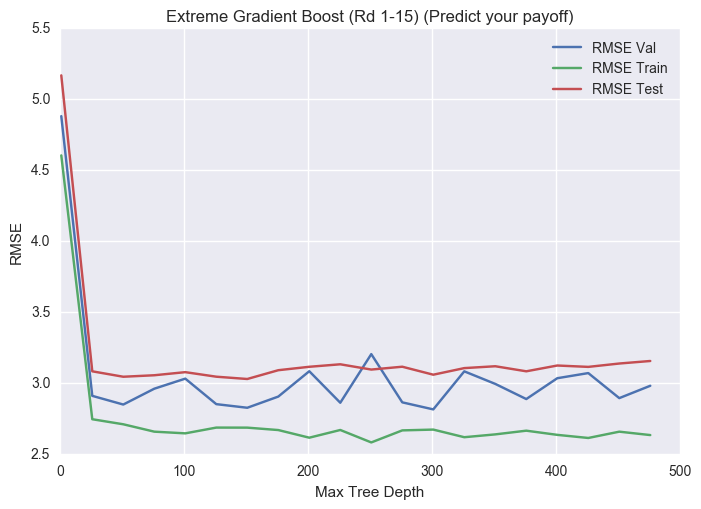

In [39]:
#plot the current model
plt.plot([i for i in range(1,500,25)], rmse_val_xgb,label='RMSE Val')
plt.plot([i for i in range(1,500,25)],rmse_train_xgb, label='RMSE Train')
plt.plot([i for i in range(1,500,25)],rmse_test_xgb, label = 'RMSE Test')
print('Min RMSE for validation set: {}, {} folds cv'.format(min(rmse_val_xgb),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for train set: {}, {} folds cs'.format(min(rmse_train_xgb),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for test set: {}, {} folds cv'.format(min(rmse_test_xgb),regression_model_15_mypayoff.number_of_folds))
plt.legend()
plt.title('Extreme Gradient Boost (Rd 1-15) (Predict your payoff)')
plt.xlabel('Max Tree Depth')
plt.ylabel('RMSE');

- Min train RMSE at 250 trees. Next, optimize the max depth.

In [40]:
txt_v_xgb,rmse_val_xgb,txt_tr_xgb,rmse_train_xgb,txt_test_xgb,rmse_test_xgb,features_xgb=\
zip(*[regression_model_15_mypayoff.extreme_gradient_boost(n_estimators_n=250,max_depth_n=i) for i in range(1,50,2)])

Min RMSE for validation set: 2.7682028480674297, 3 folds cv
Min RMSE for train set: 2.6022654643806233, 3 folds cs
Min RMSE for test set: 3.02087308185712, 3 folds cv


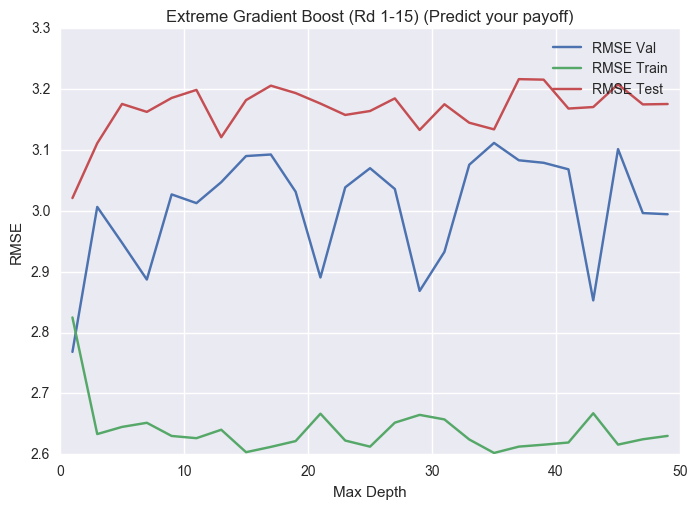

In [41]:
#plot the current model
plt.plot([i for i in range(1,50,2)], rmse_val_xgb,label='RMSE Val')
plt.plot([i for i in range(1,50,2)],rmse_train_xgb, label='RMSE Train')
plt.plot([i for i in range(1,50,2)],rmse_test_xgb, label = 'RMSE Test')
print('Min RMSE for validation set: {}, {} folds cv'.format(min(rmse_val_xgb),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for train set: {}, {} folds cs'.format(min(rmse_train_xgb),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for test set: {}, {} folds cv'.format(min(rmse_test_xgb),regression_model_15_mypayoff.number_of_folds))
plt.legend()
plt.title('Extreme Gradient Boost (Rd 1-15) (Predict your payoff)')
plt.xlabel('Max Depth')
plt.ylabel('RMSE');

- Max depth at 18 trees for min train RMSE. Next, optimize the learning rate.

In [42]:
txt_v_xgb,rmse_val_xgb,txt_tr_xgb,rmse_train_xgb,txt_test_xgb,rmse_test_xgb,features_xgb=\
zip(*[regression_model_15_mypayoff.extreme_gradient_boost(n_estimators_n=250,max_depth_n=18,learning_rate_n=i) for i in np.linspace(.01,2.0,20)])

Min RMSE for validation set: 2.8421205675524868, 3 folds cv
Min RMSE for train set: 2.5920434190372146, 3 folds cs
Min RMSE for test set: 3.1160913214458184, 3 folds cv


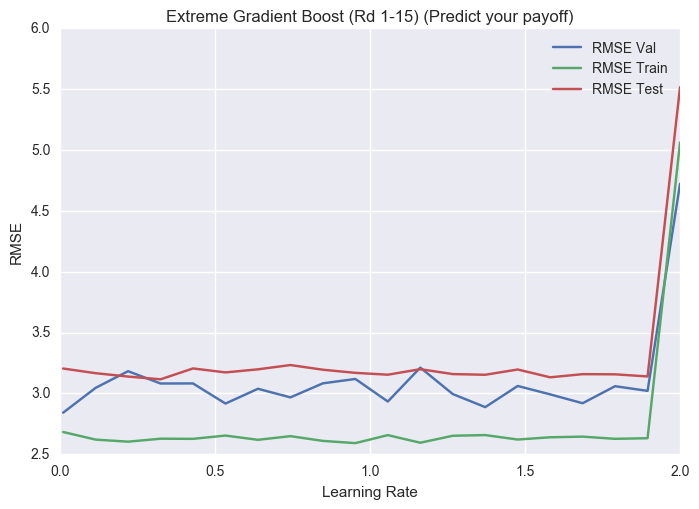

In [43]:
#plot the current model
plt.plot([i for i in np.linspace(.01,2.0,20)], rmse_val_xgb,label='RMSE Val')
plt.plot([i for i in np.linspace(.01,2.0,20)],rmse_train_xgb, label='RMSE Train')
plt.plot([i for i in np.linspace(.01,2.0,20)],rmse_test_xgb, label = 'RMSE Test')
print('Min RMSE for validation set: {}, {} folds cv'.format(min(rmse_val_xgb),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for train set: {}, {} folds cs'.format(min(rmse_train_xgb),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for test set: {}, {} folds cv'.format(min(rmse_test_xgb),regression_model_15_mypayoff.number_of_folds))
plt.legend()
plt.title('Extreme Gradient Boost (Rd 1-15) (Predict your payoff)')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE');

- Min train error at learning rate of ~2.6 at .9. Final model presented below.

#### Final Model - Extreme Gradient Boosting - Predict your payoff (rd1-15)

In [44]:
regression_model_15_mypayoff.extreme_gradient_boost(n_estimators_n=250,max_depth_n=18,learning_rate_n=.9)

('RMSE Val:',
 3.0733614145437436,
 'RMSE Train:',
 2.6367631232879325,
 'RMSE TEST:',
 3.1290933826380418,
 [('rd', 0.9228608),
  ('mypush', 0.051970467),
  ('mychoice', 0.025168778),
  ('mychoicecard', 0.0),
  ('opptpull', 0.0),
  ('opptpush', 0.0),
  ('mypull', 0.0),
  ('opptside', 0.0),
  ('myside', 0.0)])

# Elastic Net - Maximize your payoff - Rd 1-15
- Normalize the data. Note, the coefficients can only now be used to rank the importance, not to interpret what each coefficient means.

In [45]:
## look at a row to confirm it is scaled
ultimatum_rd15_df_mypayoff_X_scaled[0]

array([-1.62018517,  0.        ,  0.        , -1.        ,  1.        ,
        1.        , -1.        , -0.59018184, -0.23767018])

In [273]:
regression_model_15_mypayoff_scaled= Model_Testing_Regression(ultimatum_rd15_df_mypayoff_X_scaled,\
                                ultimatum_rd15_df_mypayoff_y,3,ultimatum_Xlabels,ultimatum_ylabels)

In [47]:
### Default model
regression_model_15_mypayoff_scaled.glm_net()

('RMSE Val:',
 3.0817831227938002,
 'RMSE Train:',
 2.9701923243199775,
 'RMSE TEST:',
 3.0337273979369321,
 [('mychoice', 0.53884828237719107),
  ('mychoicecard', 0.15026015621759733),
  ('mypush', 0.11711994165908951),
  ('mypull', 0.11707777780890484),
  ('opptpull', 0.11701010789641945),
  ('opptpush', 0.11699210978283077),
  ('opptside', 0.0),
  ('myside', 0.0),
  ('rd', 0.0)])

- First, optimize the alpha or learning rate.

In [48]:
txt_v_en,rmse_val_en,txt_tr_en,rmse_train_en,txt_test_en,rmse_test_en,features_en=\
zip(*[regression_model_15_mypayoff_scaled.glm_net(alpha_n=i) for i in np.linspace(.01,.2,50)])

Min RMSE for validation set: 2.7264741436867705, 3 folds cv
Min RMSE for train set: 2.7793639634119423, 3 folds cs
Min RMSE for test set: 2.87176991206746, 3 folds cv


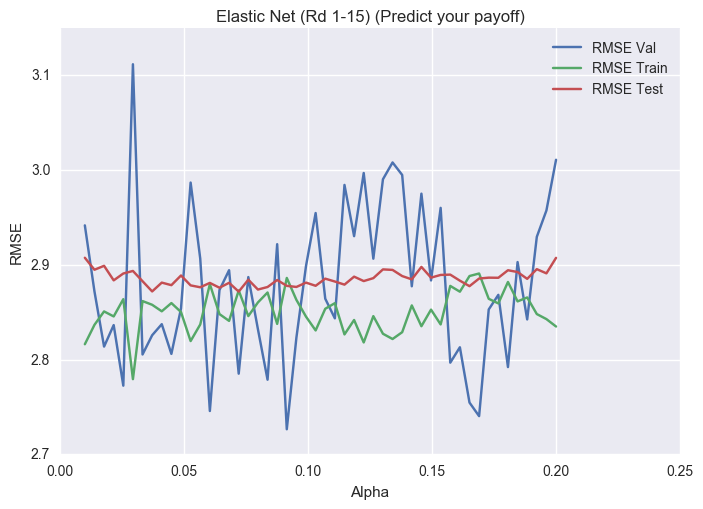

In [49]:
#plot the current model
plt.plot([i for i in np.linspace(.01,.2,50)], rmse_val_en,label='RMSE Val')
plt.plot([i for i in np.linspace(.01,.2,50)],rmse_train_en, label='RMSE Train')
plt.plot([i for i in np.linspace(.01,.2,50)],rmse_test_en, label = 'RMSE Test')
print('Min RMSE for validation set: {}, {} folds cv'.format(min(rmse_val_en),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for train set: {}, {} folds cs'.format(min(rmse_train_en),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for test set: {}, {} folds cv'.format(min(rmse_test_en),regression_model_15_mypayoff.number_of_folds))
plt.legend()
plt.title('Elastic Net (Rd 1-15) (Predict your payoff)')
plt.xlabel('Alpha')
plt.ylabel('RMSE');

- search for smaller alpha

In [50]:
txt_v_en,rmse_val_en,txt_tr_en,rmse_train_en,txt_test_en,rmse_test_en,features_en=\
zip(*[regression_model_15_mypayoff.glm_net(alpha_n=i) for i in np.linspace(.01,.2,50)])

Min RMSE for validation set: 2.6333835371160244, 3 folds cv
Min RMSE for train set: 2.7893398905554903, 3 folds cs
Min RMSE for test set: 3.0010458955772026, 3 folds cv


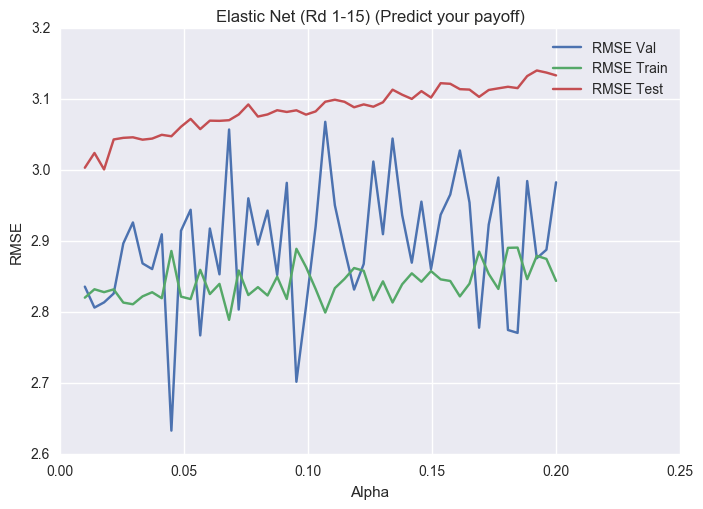

In [51]:
#plot the current model
plt.plot([i for i in np.linspace(.01,.2,50)], rmse_val_en,label='RMSE Val')
plt.plot([i for i in np.linspace(.01,.2,50)],rmse_train_en, label='RMSE Train')
plt.plot([i for i in np.linspace(.01,.2,50)],rmse_test_en, label = 'RMSE Test')
print('Min RMSE for validation set: {}, {} folds cv'.format(min(rmse_val_en),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for train set: {}, {} folds cs'.format(min(rmse_train_en),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for test set: {}, {} folds cv'.format(min(rmse_test_en),regression_model_15_mypayoff.number_of_folds))
plt.legend()
plt.title('Elastic Net (Rd 1-15) (Predict your payoff)')
plt.xlabel('Alpha')
plt.ylabel('RMSE');

- Min train cv at alpha of ~.04. Next, optimize lambda. The ratio between l1 and l2 penalty.

In [52]:
txt_v_en,rmse_val_en,txt_tr_en,rmse_train_en,txt_test_en,rmse_test_en,features_en=\
zip(*[regression_model_15_mypayoff_scaled.glm_net(alpha_n=.04,l1_ratio_n=i) for i in np.linspace(.001,.99,50)])

Min RMSE for validation set: 2.6808803877485303, 3 folds cv
Min RMSE for train set: 2.809875930420908, 3 folds cs
Min RMSE for test set: 2.869222395443606, 3 folds cv


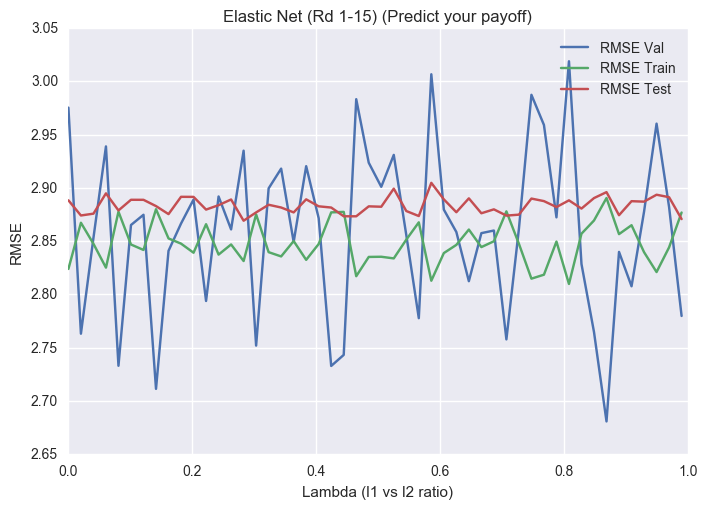

In [53]:
#plot the current model
plt.plot([i for i in np.linspace(.001,.99,50)], rmse_val_en,label='RMSE Val')
plt.plot([i for i in np.linspace(.001,.99,50)],rmse_train_en, label='RMSE Train')
plt.plot([i for i in np.linspace(.001,.99,50)],rmse_test_en, label = 'RMSE Test')
print('Min RMSE for validation set: {}, {} folds cv'.format(min(rmse_val_en),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for train set: {}, {} folds cs'.format(min(rmse_train_en),regression_model_15_mypayoff.number_of_folds))
print('Min RMSE for test set: {}, {} folds cv'.format(min(rmse_test_en),regression_model_15_mypayoff.number_of_folds))
plt.legend()
plt.title('Elastic Net (Rd 1-15) (Predict your payoff)')
plt.xlabel('Lambda (l1 vs l2 ratio)')
plt.ylabel('RMSE');

- Optimal lambda at ~.43 for min train RMSE. Print the final model.

### Final Model - Elastic net/GLMnet - Predict your payoff - Rd 1-15

In [54]:
regression_model_15_mypayoff_scaled.glm_net(alpha_n=.04,l1_ratio_n=.43)

('RMSE Val:',
 2.977482900971514,
 'RMSE Train:',
 2.8209208743187606,
 'RMSE TEST:',
 2.8820169595908958,
 [('mychoice', 1.366262414184497),
  ('opptpull', 0.21724014900129576),
  ('opptpush', 0.21391083418839521),
  ('mypush', 0.21141694854035609),
  ('mypull', 0.20801561717821385),
  ('rd', 0.071886206797152963),
  ('mychoicecard', 0.040943069244365742),
  ('opptside', 0.0),
  ('myside', 0.0)])

- Elastic net/GLMnet has a better test RMSE than RF, Gradient Boosting, and Extreme gradient boosting.
- It is interesting to note that the feature importances are ranked very differently in this regression model compared to the tree model (my choice card is the most important feature here). 
- About the same RMSE for the test set as the other two models (Gradient Boosting and Random Forest). The top two most important features are ranked the same way between these two models.

#### KNN for regression
- Need to use scaled data here to have same scale neighbors

In [274]:
# Default
regression_model_15_mypayoff_scaled.knn_regression()

('RMSE Val:',
 2.9611792364623795,
 'RMSE Train:',
 2.8548333674739546,
 'RMSE TEST:',
 3.0467722012600689)

- Tune the number of neighbors

In [277]:
txt_v_knn,rmse_val_knn,txt_tr_knn,rmse_train_knn,txt_test_knn,rmse_test_knn=\
zip(*[regression_model_15_mypayoff_scaled.knn_regression(neighbors=i) for i in range(1,50)])

Min RMSE for validation set: 2.7997765920801485, 3 folds cv
Min RMSE for train set: 2.750347909139815, 3 folds cs
Min RMSE for test set: 2.777530281345245, 3 folds cv


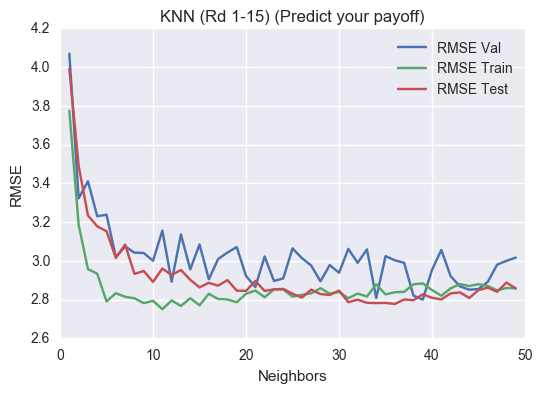

In [279]:
#plot the current model
plt.plot([i for i in range(1,50)], rmse_val_knn,label='RMSE Val')
plt.plot([i for i in range(1,50)],rmse_train_knn, label='RMSE Train')
plt.plot([i for i in range(1,50)],rmse_test_knn, label = 'RMSE Test')
print('Min RMSE for validation set: {}, {} folds cv'.format(min(rmse_val_knn),regression_model_15_mypayoff_scaled.number_of_folds))
print('Min RMSE for train set: {}, {} folds cs'.format(min(rmse_train_knn),regression_model_15_mypayoff_scaled.number_of_folds))
print('Min RMSE for test set: {}, {} folds cv'.format(min(rmse_test_knn),regression_model_15_mypayoff_scaled.number_of_folds))
plt.legend()
plt.title('KNN (Rd 1-15) (Predict your payoff)')
plt.xlabel('Neighbors')
plt.ylabel('RMSE');

- Optimal complexity around 11 neighbors.

In [339]:
regression_model_15_mypayoff_scaled.knn_regression(11)

('RMSE Val:',
 3.0194266838182613,
 'RMSE Train:',
 2.7673949755752871,
 'RMSE TEST:',
 2.9813342763585786)

# Find the best features for rd 1-15 using randomized grid search (compare to manual grid search above).
- Data to use: X_train_rd_mypayoff, X_test_rd_mypayoff, y_train_rd_mypayoff, y_test_rd_mypayoff
- Scaled data for GLMnet: X_train_rd_mypayoff_scaled, X_test_rd_mypayoff_scaled, y_train_rd_mypayoff_notscaled, y_test_rd_mypayoff_notscaled\
- Max tree depth is ~10 (log2(samples))
- Learning rate .001 to 2.0
- N_estimators for trees should asymptote after 1,000
- Max features (how many features to consider for making a split)
- L1 ratio (how much L1 vs L2 penalty to give ). For GLM/Elastic net.
- Knn: number of neighbors


In [55]:
np.shape(ultimatum_rd15_df)

(720, 12)

In [56]:
## max tree depth
np.log2(720)

9.4918530963296739

In [280]:
extreme_gradient_boost_parameters = {'max_depth':[i for i in range(1,10)], 'learning_rate':[i for i in np.linspace(.001,2.0,50)],
                                     'n_estimators':[i for i in range(50,1000,10)],
                                     'reg_alpha':[i for i in np.linspace(.001,5.0,50)],
                                     'reg_lambda':[i for i in np.linspace(.001,5.0,50)]
}
random_forest_parameters = {'n_estimators':[i for i in range(1,500)],'max_depth':[i for i in range(1,10)],\
                            'max_features':['auto','sqrt','log2']}
gradient_boost_parameters = {'loss':['ls', 'lad', 'huber', 'quantile'], 'learning_rate':[i for i in np.linspace(.001,2.0,50)],\
                            'n_estimators':[i for i in range(50,1000,10)],\
                            'max_depth':[i for i in range(1,10)],'subsample':[i for i in np.linspace(.001,1,30)],\
                              'alpha':[i for i in np.linspace(.001,.99,30)],'max_features':['auto','sqrt','log2']}
glm_net_parameters = {'alpha':[i for i in np.linspace(.001,2.99,30)],'l1_ratio':[i for i in np.linspace(.001,1.0,100)]  
}
knn_parameters = {'n_neighbors':[i for i in range(1,100)]}


#### Random Forest

In [58]:
#Random Forest - searhc through the training dataset
best_rf_rd15_model = regression_model_15_mypayoff.random_grid_search(model='random_forest',params_dict=random_forest_parameters)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.4min finished


In [59]:
# Best random forest
best_rf_rd15_mypayoff = best_rf_rd15_model


X_train_rd_mypayoff=regression_model_15_mypayoff.X_trainval ## make sure no data leakage, use same train test split in class
y_train_rd_mypayoff=regression_model_15_mypayoff.y_trainval
X_test_rd_mypayoff=regression_model_15_mypayoff.X_test ## make sure no data leakage, use same train test split in class
y_test_rd_mypayoff=regression_model_15_mypayoff.y_test

best_rf_rd15_mypayoff.fit( X_train_rd_mypayoff, y_train_rd_mypayoff)


best_rf_rd15_rmse =euclidean(y_test_rd_mypayoff,best_rf_rd15_mypayoff.predict(X_test_rd_mypayoff))/sqrt(len(y_test_rd_mypayoff))
print('Best RF RMSE :{}'.format(best_rf_rd15_rmse))
print()
best_rf_rd15_r2 =r2_score(y_test_rd_mypayoff,best_rf_rd15_mypayoff.predict(X_test_rd_mypayoff))
print('Best RF R^2 score :{:.2%}'.format(r2_score(y_test_rd_mypayoff,best_rf_rd15_mypayoff.predict(X_test_rd_mypayoff))))
print()
print([('Feature:',i,'Importance:',f)\
for f,i in zip(best_rf_rd15_mypayoff.feature_importances_[np.argsort(best_rf_rd15_mypayoff.feature_importances_)[::-1]],\
                                                    regression_model_15_mypayoff.x_labels[np.argsort(best_rf_rd15_mypayoff.feature_importances_)[::-1]])])

Best RF RMSE :3.02951838020717

Best RF R^2 score :29.70%

[('Feature:', 'mychoicecard', 'Importance:', 0.32711198827198712), ('Feature:', 'mychoice', 'Importance:', 0.28478261371792657), ('Feature:', 'opptpush', 'Importance:', 0.10701251384373557), ('Feature:', 'mypull', 'Importance:', 0.10478680396780875), ('Feature:', 'opptpull', 'Importance:', 0.077190096108295636), ('Feature:', 'mypush', 'Importance:', 0.07602490101898926), ('Feature:', 'rd', 'Importance:', 0.023091083071257418), ('Feature:', 'opptside', 'Importance:', 0.0), ('Feature:', 'myside', 'Importance:', 0.0)]


In [341]:
# save the model to disk
filename = 'rf_rd15.sav'
joblib.dump(best_rf_rd15_mypayoff, filename)

['rf_rd15.sav']

#### Gradient Boost

In [60]:
## search through the training data set for these rounds
best_gradientboost_rd15_model =regression_model_15_mypayoff.random_grid_search(model='gradient_boost',params_dict=gradient_boost_parameters)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  2.4min finished


In [61]:
#Best Gradient Boost model
best_gb_rd15_mypayoff = best_gradientboost_rd15_model

X_train_rd_mypayoff=regression_model_15_mypayoff.X_trainval ## make sure no data leakage, use same train test split in class
y_train_rd_mypayoff=regression_model_15_mypayoff.y_trainval
X_test_rd_mypayoff=regression_model_15_mypayoff.X_test ## make sure no data leakage, use same train test split in class
y_test_rd_mypayoff=regression_model_15_mypayoff.y_test
best_gb_rd15_mypayoff.fit(X_train_rd_mypayoff,y_train_rd_mypayoff)

best_gb_rd15_rmse = euclidean(y_test_rd_mypayoff,best_gb_rd15_mypayoff.predict(X_test_rd_mypayoff))/sqrt(len(y_test_rd_mypayoff))
print('Best GB RMSE :{}'.format(best_gb_rd15_rmse))
print()
best_gb_rd15_r2 = r2_score(y_test_rd_mypayoff,best_gb_rd15_mypayoff.predict(X_test_rd_mypayoff))
print('Best GB R^2 Score: {:.2%}'.format(r2_score(y_test_rd_mypayoff,best_gb_rd15_mypayoff.predict(X_test_rd_mypayoff))))
print()
print([('Feature:',i,'Importance:',f)\
for f,i in zip(best_gb_rd15_mypayoff.feature_importances_[np.argsort(best_gb_rd15_mypayoff.feature_importances_)[::-1]],\
                                                    regression_model_15_mypayoff.x_labels[np.argsort(best_gb_rd15_mypayoff.feature_importances_)[::-1]])])

Best GB RMSE :3.0090554812603916

Best GB R^2 Score: 30.65%

[('Feature:', 'rd', 'Importance:', 0.24166666666666667), ('Feature:', 'mychoicecard', 'Importance:', 0.21666666666666667), ('Feature:', 'mychoice', 'Importance:', 0.14583333333333334), ('Feature:', 'mypush', 'Importance:', 0.125), ('Feature:', 'opptpull', 'Importance:', 0.10000000000000001), ('Feature:', 'mypull', 'Importance:', 0.10000000000000001), ('Feature:', 'opptpush', 'Importance:', 0.070833333333333331), ('Feature:', 'opptside', 'Importance:', 0.0), ('Feature:', 'myside', 'Importance:', 0.0)]


In [342]:
# save the model to disk
filename = 'gb_rd15.sav'
joblib.dump(best_gb_rd15_mypayoff, filename)

['gb_rd15.sav']

#### Extreme Gradient Boost

In [62]:
# Search through the training dataset for these rounds
best_xgb_rd15_model =regression_model_15_mypayoff.random_grid_search(model='extreme_gradient_boost',params_dict=extreme_gradient_boost_parameters)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   14.9s finished


In [63]:
## Best Extreme Gradient Boosting
best_xgb_rd15_mypayoff=best_xgb_rd15_model 

X_train_rd_mypayoff=regression_model_15_mypayoff.X_trainval ## make sure no data leakage, use same train test split in class
y_train_rd_mypayoff=regression_model_15_mypayoff.y_trainval
X_test_rd_mypayoff=regression_model_15_mypayoff.X_test ## make sure no data leakage, use same train test split in class
y_test_rd_mypayoff=regression_model_15_mypayoff.y_test

best_xgb_rd15_mypayoff.fit( X_train_rd_mypayoff, y_train_rd_mypayoff)
best_xgb_rd15_rmse = euclidean(y_test_rd_mypayoff,best_xgb_rd15_mypayoff.predict(X_test_rd_mypayoff))/sqrt(len(y_test_rd_mypayoff))
print('Best XGB RMSE :{}'.format(best_xgb_rd15_rmse))
print()
best_xgb_rd15_r2 = r2_score(y_test_rd_mypayoff,best_xgb_rd15_mypayoff.predict(X_test_rd_mypayoff))
print('Best R^2 score for XGB : {:.2%}'.format(r2_score(y_test_rd_mypayoff,best_xgb_rd15_mypayoff.predict(X_test_rd_mypayoff))))
print()
print([('Feature:',i,'Importance:',f)\
for f,i in zip(best_xgb_rd15_mypayoff.feature_importances_[np.argsort(best_xgb_rd15_mypayoff.feature_importances_)[::-1]],\
        regression_model_15_mypayoff.x_labels[np.argsort(best_xgb_rd15_mypayoff.feature_importances_)[::-1]])])

Best XGB RMSE :3.034548778549405

Best R^2 score for XGB : 29.47%

[('Feature:', 'mychoice', 'Importance:', 0.5090909), ('Feature:', 'mypush', 'Importance:', 0.46363637), ('Feature:', 'rd', 'Importance:', 0.027272727), ('Feature:', 'mychoicecard', 'Importance:', 0.0), ('Feature:', 'opptpull', 'Importance:', 0.0), ('Feature:', 'opptpush', 'Importance:', 0.0), ('Feature:', 'mypull', 'Importance:', 0.0), ('Feature:', 'opptside', 'Importance:', 0.0), ('Feature:', 'myside', 'Importance:', 0.0)]


In [343]:
# save the model to disk
filename = 'xgb_rd15.sav'
joblib.dump(best_xgb_rd15_mypayoff, filename)

['xgb_rd15.sav']

#### GLM/Elastic net

In [65]:
## find best GLM/Elastic net - searching through thetraining dataset (for these rounds)
best_glm_rd15_model = regression_model_15_mypayoff_scaled.random_grid_search(model='glm_net',params_dict=glm_net_parameters,iterations=1000);

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: Conv

In [66]:
#Best GLMnet/Elastic net model
best_glmnet_rd15_mypayoff=best_glm_rd15_model 

X_train_rd_mypayoff_scaled= regression_model_15_mypayoff_scaled.X_trainval ## use same data partion as in the class
y_train_rd_mypayoff_notscaled= regression_model_15_mypayoff_scaled.y_trainval
X_test_rd_mypayoff_scaled= regression_model_15_mypayoff_scaled.X_test ## use same data partion as in the class
y_test_rd_mypayoff_notscaled= regression_model_15_mypayoff_scaled.y_test

best_glmnet_rd15_mypayoff.fit( X_train_rd_mypayoff_scaled, y_train_rd_mypayoff_notscaled)

best_glmnet_rd15_rmse = euclidean(y_test_rd_mypayoff_notscaled,best_glmnet_rd15_mypayoff.predict(X_test_rd_mypayoff_scaled))/\
                                     sqrt(len(y_test_rd_mypayoff_notscaled))
print('Best GLMnet RMSE : {}'.format(best_glmnet_rd15_rmse))
print()
best_glmnet_rd15_r2 =r2_score(y_test_rd_mypayoff_notscaled,best_glmnet_rd15_mypayoff.predict(X_test_rd_mypayoff_scaled))
print('Best R^2 for GLMnet/Elastic net :{:.2%}'.format(r2_score(y_test_rd_mypayoff_notscaled,best_glmnet_rd15_mypayoff.predict(X_test_rd_mypayoff_scaled))))
print()
print([('Feature:',i,'Importance:',abs(f))\
for f,i in zip(best_glmnet_rd15_mypayoff.coef_[np.argsort(abs(best_glmnet_rd15_mypayoff.coef_))[::-1]],\
                regression_model_15_mypayoff.x_labels[np.argsort(abs(best_glmnet_rd15_mypayoff.coef_))[::-1]])])

sorted_featres_glm_rd15 = [abs(i) for i in best_glmnet_rd15_mypayoff.coef_[np.argsort(abs(best_glmnet_rd15_mypayoff.coef_))[::-1]]]
features_weights_sorted_glm_rd15 = regression_model_15_mypayoff.x_labels[np.argsort(abs(best_glmnet_rd15_mypayoff.coef_))[::-1]]

Best GLMnet RMSE : 2.9033046305011054

Best R^2 for GLMnet/Elastic net :25.62%

[('Feature:', 'mychoice', 'Importance:', 2.2355391781285574), ('Feature:', 'mychoicecard', 'Importance:', 0.87138662906940423), ('Feature:', 'mypush', 'Importance:', 0.27653515842871673), ('Feature:', 'mypull', 'Importance:', 0.26801447976242038), ('Feature:', 'rd', 'Importance:', 0.17452043169335713), ('Feature:', 'opptpush', 'Importance:', 0.133580329868735), ('Feature:', 'opptpull', 'Importance:', 0.044602786418878382), ('Feature:', 'opptside', 'Importance:', 0.0), ('Feature:', 'myside', 'Importance:', 0.0)]


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [345]:
# save the model to disk
filename = 'glm_rd15.sav'
joblib.dump(best_glmnet_rd15_mypayoff, filename)

['glm_rd15.sav']

#### KNNRegression

In [282]:
## find best GLM/Elastic net - searching through thetraining dataset (for these rounds)
best_knn_rd15_model = regression_model_15_mypayoff_scaled.random_grid_search(model='knn_regression',params_dict=knn_parameters,iterations=50);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished


In [283]:
#Best GLMnet/Elastic net model
best_knn_rd15_mypayoff=best_knn_rd15_model

X_train_rd_mypayoff_scaled= regression_model_15_mypayoff_scaled.X_trainval ## use same data partion as in the class
y_train_rd_mypayoff_notscaled= regression_model_15_mypayoff_scaled.y_trainval
X_test_rd_mypayoff_scaled= regression_model_15_mypayoff_scaled.X_test ## use same data partion as in the class
y_test_rd_mypayoff_notscaled= regression_model_15_mypayoff_scaled.y_test

best_knn_rd15_mypayoff.fit( X_train_rd_mypayoff_scaled, y_train_rd_mypayoff_notscaled)

best_knn_rd15_rmse = euclidean(y_test_rd_mypayoff_notscaled,best_knn_rd15_mypayoff.predict(X_test_rd_mypayoff_scaled))/\
                                     sqrt(len(y_test_rd_mypayoff_notscaled))
print('Best GLMnet RMSE : {}'.format(best_knn_rd15_rmse))
print()
best_knn_rd15_r2 =r2_score(y_test_rd_mypayoff_notscaled,best_knn_rd15_mypayoff.predict(X_test_rd_mypayoff_scaled))
print('Best R^2 for GLMnet/Elastic net :{:.2%}'.format(r2_score(y_test_rd_mypayoff_notscaled,best_knn_rd15_mypayoff.predict(X_test_rd_mypayoff_scaled))))
print()



Best GLMnet RMSE : 2.8205193991341315

Best R^2 for GLMnet/Elastic net :23.90%



In [346]:
# save the model to disk
filename = 'knn_rd15.sav'
joblib.dump(best_knn_rd15_mypayoff, filename)

['knn_rd15.sav']

## Best model for  Rd 1-15 to maximize your payoff
> The best model is hard to tell, but KNNRegression appears to be the best in terms of RMSE. However, since KNN can not give us feature importance, we will use GLMnet/Elastic Net for that analysis. The fact that KNNregression is our best performing model indicates that these data points are well clustered together. FOr this problem, this means that the clusters of features values (your push card, your pull card, rd number ..etc) are good predictors for your payout. Note, that the coefficients here are scaled so you can only rank by importance; you can not directly interpret these coefficients.
- RMSE: ~2.8
- For this model, top features are;
    - 1) mychoice: 
    - 2) mychoicecard:
    - 3) mypush: 
- This means that ultimately, the best predictor of your payoff in the first 15 rounds using a GLMnet model is whether you pull or push (and the amount that you pull/push for). The best strategy is to push money to the other player (have my choice =1) based upon these feature importances.

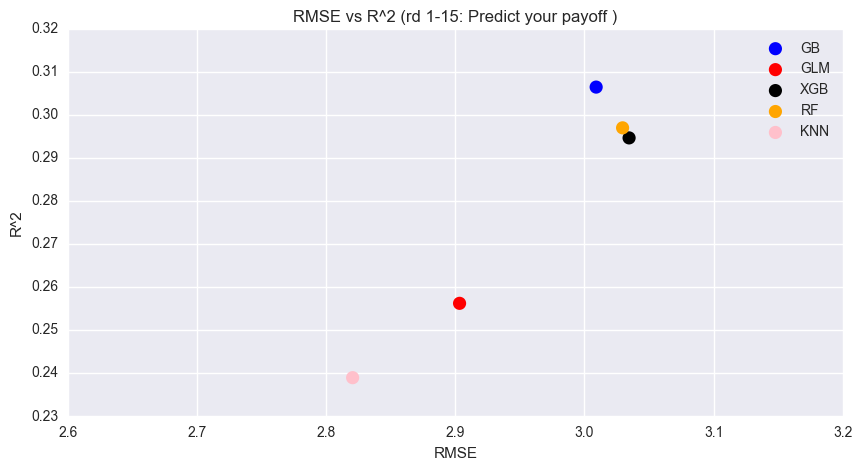

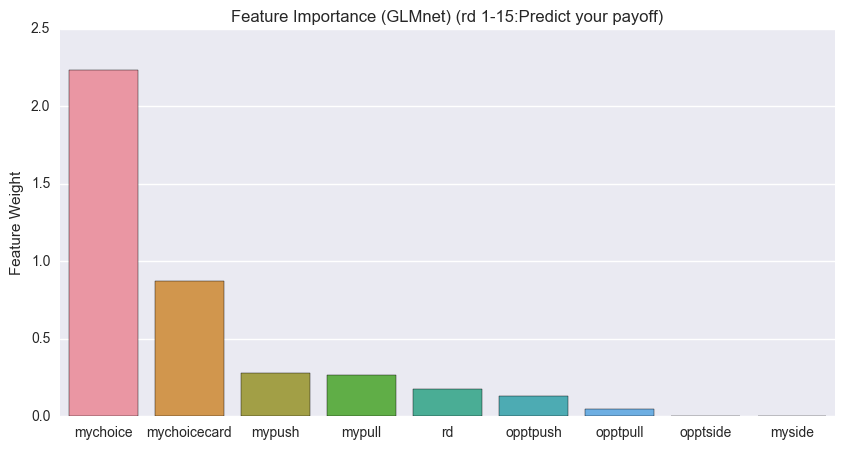

In [285]:
plt.figure(figsize=(10,5))
plt.scatter(best_gb_rd15_rmse,best_gb_rd15_r2,label='GB',color='b',linewidths=(5,5))
plt.scatter(best_glmnet_rd15_rmse,best_glmnet_rd15_r2,label='GLM',color='r',linewidths=(5,5))
plt.scatter(best_xgb_rd15_rmse,best_xgb_rd15_r2,label='XGB',color='black',linewidths=(5,5))
plt.scatter(best_rf_rd15_rmse,best_rf_rd15_r2,label='RF',color='orange',linewidths=(5,5))
plt.scatter(best_knn_rd15_rmse,best_knn_rd15_r2,label='KNN',color='pink',linewidths=(5,5))
plt.xlim(2.6,3.2)
plt.title('RMSE vs R^2 (rd 1-15: Predict your payoff )')
plt.xlabel('RMSE')
plt.ylabel('R^2')
plt.legend();
plt.figure(figsize=(10,5))
sns.barplot(x=features_weights_sorted_glm_rd15,y=sorted_featres_glm_rd15)
plt.title('Feature Importance (GLMnet) (rd 1-15:Predict your payoff)')
plt.ylabel('Feature Weight')


# Maximize your payoff incorporating a side payment (RDs 15+)
- We will use the default parameters to show the baseline performane, and then gridsearch to find the best hyperparameters.


In [68]:
np.shape(ultimatum_pastrd15_df_mypayoff_X)

(1200, 9)

In [69]:
#Max depth still ~10
np.log2(1200)

10.228818690495881

In [70]:
### Almost twice the amount of data compared to the first 15 rounds.

### Random Forest - Predict your payoff - Past rd 15

In [71]:
regression_model_past15_mypayoff = Model_Testing_Regression(ultimatum_pastrd15_df_mypayoff_X,\
                                                            ultimatum_pastrd15_df_mypayoff_y,3,\
                                                           ultimatum_Xlabels ,\
                                                           ultimatum_ylabels)

In [72]:
#Default Random Forest
regression_model_past15_mypayoff.random_forest()

('RMSE Val:',
 1.5264357029024644,
 'RMSE Train:',
 0.73741116307914589,
 'RMSE TEST:',
 1.6097831484671754,
 [('opptside', 0.3154600240300845),
  ('myside', 0.23833974810186978),
  ('rd', 0.23132419449178285),
  ('mypull', 0.057665371822459156),
  ('opptpull', 0.041604400316615317),
  ('mychoicecard', 0.036825610417196945),
  ('mychoice', 0.030943216831006811),
  ('mypush', 0.029189849462810957),
  ('opptpush', 0.018647584526173711)])

- Much lower RMSE than the previous 15 rounds. 

### Gradient Boosting - Predict your payoff - Past rd 15

In [73]:
# Default Gradient Boost
regression_model_past15_mypayoff.gradient_boost()

('RMSE Val:',
 1.3846453011516229,
 'RMSE Train:',
 1.1871970309299895,
 'RMSE TEST:',
 1.5054904005604399,
 [('opptside', 0.26649437546657978),
  ('myside', 0.24629721973389077),
  ('rd', 0.23509063619303153),
  ('mychoicecard', 0.099489455671178936),
  ('mychoice', 0.054650542958908678),
  ('mypush', 0.030826699274833658),
  ('opptpush', 0.024054292214733805),
  ('opptpull', 0.021952685266509592),
  ('mypull', 0.021144093220333209)])

- Also, much lower RMSE (and lower then RF)>

### Extreme Gradient Boosting - Predict your payoff - Past rd 15

In [74]:
regression_model_past15_mypayoff.extreme_gradient_boost()

('RMSE Val:',
 1.3899535645503622,
 'RMSE Train:',
 1.1849335774866618,
 'RMSE TEST:',
 1.5004846073902212,
 [('opptside', 0.28201142),
  ('rd', 0.26956347),
  ('myside', 0.24937181),
  ('mychoice', 0.088740438),
  ('mypush', 0.069546036),
  ('mychoicecard', 0.040766861),
  ('opptpull', 0.0),
  ('opptpush', 0.0),
  ('mypull', 0.0)])

- Slightly better performance from regular gradient boosting.

### GLMnet (Elastic Net) - Predict your payoff - Past rd 15
- Need to use scaled data here to ensure that all features are in the same space.
- Data: X_train_pastrd15_mypayoff_scaled, X_test_pastrd15_mypayoff_scaled, y_train_pastrd15_mypayoff_notscaled,
y_test_pastrd15_mypayoff_notscaled
- Data :ultimatum_pastrd15_df_mypayoff_X_scaled 

In [286]:
regression_model_past15_mypayoff_scaled = Model_Testing_Regression(ultimatum_pastrd15_df_mypayoff_X_scaled,\
                                                            ultimatum_pastrd15_df_mypayoff_y,3,\
                                                           ultimatum_Xlabels ,\
                                                           ultimatum_ylabels)

In [76]:
#Default GLM net
regression_model_past15_mypayoff_scaled.glm_net()

('RMSE Val:',
 1.7505871996525713,
 'RMSE Train:',
 1.8238674553281105,
 'RMSE TEST:',
 1.8699049010073192,
 [('opptside', 0.11616791521169424),
  ('mypull', 0.047650914135464663),
  ('mypush', 0.047645281446808303),
  ('opptpush', 0.047638080469332572),
  ('opptpull', 0.047631416681670785),
  ('mychoicecard', 0.0),
  ('mychoice', 0.0),
  ('myside', 0.0),
  ('rd', 0.0)])

#### KNNregression - Predict your payoff - Past rd 15

In [287]:
#Default KNN
regression_model_past15_mypayoff_scaled.knn_regression()

('RMSE Val:',
 1.4477903218179893,
 'RMSE Train:',
 1.2685809132160253,
 'RMSE TEST:',
 1.5321250846073351)

## Random gridsearch to maximize your payoff, past rd 15

- Max tree depth is ~10 (log2(samples))
- Learning rate .001 to 2.0
- N_estimators for trees should asymptote after 1,000
- Max features (how many features to consider for making a split)
- L1 ratio (how much L1 vs L2 penalty to give ). For GLM/Elastic net. 
- KNN - number of neighbors

In [288]:
extreme_gradient_boost_parameters = {'max_depth':[i for i in range(1,10)], 'learning_rate':[i for i in np.linspace(.001,2.0,50)],
                                     'n_estimators':[i for i in range(50,1000,10)],
                                     'reg_alpha':[i for i in np.linspace(.001,5.0,50)],
                                     'reg_lambda':[i for i in np.linspace(.001,5.0,50)]
}
random_forest_parameters = {'n_estimators':[i for i in range(1,500)],'max_depth':[i for i in range(1,10)],\
                            'max_features':['auto','sqrt','log2']}
gradient_boost_parameters = {'loss':['ls', 'lad', 'huber', 'quantile'], 'learning_rate':[i for i in np.linspace(.001,2.0,50)],\
                            'n_estimators':[i for i in range(50,1000,10)],\
                            'max_depth':[i for i in range(1,10)],'subsample':[i for i in np.linspace(.001,1,30)],\
                              'alpha':[i for i in np.linspace(.001,.99,30)],'max_features':['auto','sqrt','log2']}
glm_net_parameters = {'alpha':[i for i in np.linspace(.001,2.99,30)],'l1_ratio':[i for i in np.linspace(.001,1.0,100)]  
}
knn_parameters = {'n_neighbors':[i for i in range(1,100)]}


In [78]:
#Random Forest - train on thetraining  data set

best_rf_pastrd15_model = regression_model_past15_mypayoff.random_grid_search(model='random_forest',params_dict=random_forest_parameters)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.7min finished


#### Random Forest

In [114]:
#Best Random Forest Model
best_rf_pastrd15_mypayoff = best_rf_pastrd15_model


## use the same data partion as in the class
X_train_pastrd15_mypayoff = regression_model_past15_mypayoff.X_trainval
y_train_pastrd15_mypayoff = regression_model_past15_mypayoff.y_trainval
X_test_pastrd15_mypayoff = regression_model_past15_mypayoff.X_test
y_test_pastrd15_mypayoff = regression_model_past15_mypayoff.y_test

best_rf_pastrd15_mypayoff.fit( X_train_pastrd15_mypayoff, y_train_pastrd15_mypayoff)
### train test split from the initial data partion
best_rf_pastrd15_rmse=euclidean(y_test_pastrd15_mypayoff,best_rf_pastrd15_mypayoff.predict(X_test_pastrd15_mypayoff))/sqrt(len(y_test_pastrd15_mypayoff))
print('Best RF RMSE :{}'.format(best_rf_pastrd15_rmse))
print()
best_rf_pastrd15_r2 = r2_score(y_test_pastrd15_mypayoff,best_rf_pastrd15_mypayoff.predict(X_test_pastrd15_mypayoff))
print('Best RF R^2 :{:.2%}'.format(r2_score(y_test_pastrd15_mypayoff,best_rf_pastrd15_mypayoff.predict(X_test_pastrd15_mypayoff))))
print()
print([('Feature:',i,'Importance:',f)\
for f,i in zip(best_rf_pastrd15_mypayoff.feature_importances_[np.argsort(best_rf_pastrd15_mypayoff.feature_importances_)[::-1]],\
    regression_model_past15_mypayoff.x_labels[np.argsort(best_rf_pastrd15_mypayoff.feature_importances_)[::-1]])])

sorted_featres_rf_pastrd15 = best_rf_pastrd15_mypayoff.feature_importances_[np.argsort(best_rf_pastrd15_mypayoff.feature_importances_)[::-1]]
features_weights_sorted_rf_pastrd15 = regression_model_past15_mypayoff.x_labels[np.argsort(best_rf_pastrd15_mypayoff.feature_importances_)[::-1]]

Best RF RMSE :1.4774412750236567

Best RF R^2 :37.51%

[('Feature:', 'opptside', 'Importance:', 0.3588413882509115), ('Feature:', 'myside', 'Importance:', 0.26581137818627687), ('Feature:', 'rd', 'Importance:', 0.070046934288112428), ('Feature:', 'opptpull', 'Importance:', 0.064680130842493133), ('Feature:', 'opptpush', 'Importance:', 0.064019794657233592), ('Feature:', 'mypull', 'Importance:', 0.058487776835245614), ('Feature:', 'mypush', 'Importance:', 0.047309353168793901), ('Feature:', 'mychoicecard', 'Importance:', 0.038261829652025944), ('Feature:', 'mychoice', 'Importance:', 0.032541414118906722)]


In [347]:
# save the model to disk
filename = 'rf_pastrd15.sav'
joblib.dump(best_rf_pastrd15_mypayoff, filename)

['rf_pastrd15.sav']

#### Gradient Boosting

In [80]:
#Gradient Boosting - looking through the training data set

best_gb_pastrd15_model = regression_model_past15_mypayoff.random_grid_search(model='gradient_boost',params_dict=gradient_boost_parameters)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  3.5min finished


In [81]:
# Best Gradient Boosting Model


best_gb_pastrd15_mypayoff = best_gb_pastrd15_model
## use the same data partion as in the class
X_train_pastrd15_mypayoff = regression_model_past15_mypayoff.X_trainval
y_train_pastrd15_mypayoff = regression_model_past15_mypayoff.y_trainval
X_test_pastrd15_mypayoff = regression_model_past15_mypayoff.X_test
y_test_pastrd15_mypayoff = regression_model_past15_mypayoff.y_test

best_gb_pastrd15_model.fit(X_train_pastrd15_mypayoff,y_train_pastrd15_mypayoff)
    

best_gb_pastrd15_rmse=euclidean(y_test_pastrd15_mypayoff,best_gb_pastrd15_mypayoff.predict(X_test_pastrd15_mypayoff))/sqrt(len(y_test_pastrd15_mypayoff))
print('Best GB RMSE :{}'.format(best_gb_pastrd15_rmse))
print()
best_gb_pastrd15_r2 = r2_score(y_test_pastrd15_mypayoff,best_gb_pastrd15_mypayoff.predict(X_test_pastrd15_mypayoff))
print('Best GB R^2:{:.2%}'.format(r2_score(y_test_pastrd15_mypayoff,best_gb_pastrd15_mypayoff.predict(X_test_pastrd15_mypayoff))))
print()
print([('Feature:',i,'Importance:',f)\
for f,i in zip(best_gb_pastrd15_mypayoff.feature_importances_[np.argsort(best_gb_pastrd15_mypayoff.feature_importances_)[::-1]],\
    regression_model_past15_mypayoff.x_labels[np.argsort(best_gb_pastrd15_mypayoff.feature_importances_)[::-1]])])


sorted_featres_gb_pastrd15 = best_gb_pastrd15_mypayoff.feature_importances_[np.argsort(best_gb_pastrd15_mypayoff.feature_importances_)[::-1]]
features_weights_sorted_gb_pastrd15 = regression_model_past15_mypayoff.x_labels[np.argsort(best_gb_pastrd15_mypayoff.feature_importances_)[::-1]]

Best GB RMSE :1.5255218878854993

Best GB R^2:33.38%

[('Feature:', 'rd', 'Importance:', 0.53500000000000003), ('Feature:', 'myside', 'Importance:', 0.20999999999999999), ('Feature:', 'opptside', 'Importance:', 0.16500000000000001), ('Feature:', 'mychoicecard', 'Importance:', 0.059999999999999998), ('Feature:', 'mychoice', 'Importance:', 0.02), ('Feature:', 'opptpush', 'Importance:', 0.0050000000000000001), ('Feature:', 'mypush', 'Importance:', 0.0050000000000000001), ('Feature:', 'opptpull', 'Importance:', 0.0), ('Feature:', 'mypull', 'Importance:', 0.0)]


In [348]:
# save the model to disk
filename = 'gb_pastrd15.sav'
joblib.dump(best_gb_pastrd15_mypayoff, filename)

['gb_pastrd15.sav']

#### Extreme Gradient Boosting

In [82]:
#- looking through the traiing data set# Extreme Gradient Boosting


best_xgb_pastrd15_model = regression_model_past15_mypayoff.random_grid_search(model='extreme_gradient_boost',params_dict=extreme_gradient_boost_parameters)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   21.5s finished


In [83]:
# Best Extreme  Gradient Boosting Model 


best_xgb_pastrd15_mypayoff = best_xgb_pastrd15_model

## use the same data partion as in the class
X_train_pastrd15_mypayoff = regression_model_past15_mypayoff.X_trainval
y_train_pastrd15_mypayoff = regression_model_past15_mypayoff.y_trainval
X_test_pastrd15_mypayoff = regression_model_past15_mypayoff.X_test
y_test_pastrd15_mypayoff = regression_model_past15_mypayoff.y_test


best_xgb_pastrd15_mypayoff.fit( X_train_pastrd15_mypayoff, y_train_pastrd15_mypayoff)
### train test split from the initial data partion
best_xgb_pastrd15_rmse=euclidean(y_test_pastrd15_mypayoff,best_xgb_pastrd15_mypayoff.predict(X_test_pastrd15_mypayoff))/sqrt(len(y_test_pastrd15_mypayoff))
print('Best XGB RMSE :{}'.format(best_xgb_pastrd15_rmse))
print()
best_xgb_pastrd15_r2 = r2_score(y_test_pastrd15_mypayoff,best_xgb_pastrd15_mypayoff.predict(X_test_pastrd15_mypayoff))
print('Best XGB R^2 score: {:.2%}'.format(r2_score(y_test_pastrd15_mypayoff,best_xgb_pastrd15_mypayoff.predict(X_test_pastrd15_mypayoff))))
print()
print([('Feature:',i,'Importance:',f)\
for f,i in zip(best_xgb_pastrd15_mypayoff.feature_importances_[np.argsort(best_xgb_pastrd15_mypayoff.feature_importances_)[::-1]],\
    regression_model_past15_mypayoff.x_labels[np.argsort(best_xgb_pastrd15_mypayoff.feature_importances_)[::-1]])])




Best XGB RMSE :1.5265470748706793

Best XGB R^2 score: 33.29%

[('Feature:', 'rd', 'Importance:', 0.2912088), ('Feature:', 'myside', 'Importance:', 0.26648352), ('Feature:', 'opptside', 'Importance:', 0.25549451), ('Feature:', 'mypush', 'Importance:', 0.068681322), ('Feature:', 'mychoice', 'Importance:', 0.060439561), ('Feature:', 'mychoicecard', 'Importance:', 0.057692308), ('Feature:', 'opptpull', 'Importance:', 0.0), ('Feature:', 'opptpush', 'Importance:', 0.0), ('Feature:', 'mypull', 'Importance:', 0.0)]


In [349]:
# save the model to disk
filename = 'xgb_pastrd15.sav'
joblib.dump(best_xgb_pastrd15_mypayoff, filename)

['xgb_pastrd15.sav']

#### GLM/Elastic Net

In [84]:
##glm net/ Elastic net - looking through the training data set. Convergence warning due to a small alpha

best_glm_pastrd15_model = regression_model_past15_mypayoff_scaled.random_grid_search(model='glm_net', params_dict=glm_net_parameters, iterations=3000)

Fitting 3 folds for each of 3000 candidates, totalling 9000 fits


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: Conv

In [85]:
# Best elastic net/glm net

best_glmnet_pastrd15_mypayoff = best_glm_pastrd15_model

## use the same data partion as in the class
X_train_pastrd15_mypayoff_scaled = regression_model_past15_mypayoff_scaled.X_trainval
y_train_pastrd15_mypayoff_notscaled = regression_model_past15_mypayoff_scaled.y_trainval
X_test_pastrd15_mypayoff_scaled = regression_model_past15_mypayoff_scaled.X_test
y_test_pastrd15_mypayoff_notscaled = regression_model_past15_mypayoff_scaled.y_test

best_glmnet_pastrd15_mypayoff.fit( X_train_pastrd15_mypayoff_scaled, y_train_pastrd15_mypayoff_notscaled)
### train test split from the initial data partion
best_glmnet_pastrd15_rmse=euclidean(y_test_pastrd15_mypayoff_notscaled,\
best_glmnet_pastrd15_mypayoff.predict(X_test_pastrd15_mypayoff_scaled))/sqrt(len(y_test_pastrd15_mypayoff_notscaled))
print('Best GLMnet/Elastic Net RMSE :{}'.format(best_glmnet_pastrd15_rmse))
print()
best_glmnet_pastrd15_r2=r2_score(y_test_pastrd15_mypayoff_notscaled,\
best_glmnet_pastrd15_mypayoff.predict(X_test_pastrd15_mypayoff_scaled))
print('Best R^2 score {:.2%}'.format(r2_score(y_test_pastrd15_mypayoff_notscaled,\
best_glmnet_pastrd15_mypayoff.predict(X_test_pastrd15_mypayoff_scaled))))
print()
print([('Feature:',i,'Importance:',abs(f))\
for f,i in zip(best_glmnet_pastrd15_mypayoff.coef_[np.argsort(abs(best_glmnet_pastrd15_mypayoff.coef_))[::-1]],\
    regression_model_past15_mypayoff.x_labels[np.argsort(abs(best_glmnet_pastrd15_mypayoff.coef_))[::-1]])])

Best GLMnet/Elastic Net RMSE :1.6816286286480089

Best R^2 score 26.67%

[('Feature:', 'mypush', 'Importance:', 0.70314897290296441), ('Feature:', 'mychoice', 'Importance:', 0.69278101248122181), ('Feature:', 'opptside', 'Importance:', 0.64784805071478846), ('Feature:', 'mychoicecard', 'Importance:', 0.62266194670657515), ('Feature:', 'rd', 'Importance:', 0.12048941230593609), ('Feature:', 'myside', 'Importance:', 0.03413926206485178), ('Feature:', 'mypull', 'Importance:', 1.3161682776825765e-14), ('Feature:', 'opptpull', 'Importance:', 0.0), ('Feature:', 'opptpush', 'Importance:', 0.0)]


In [350]:
# save the model to disk
filename = 'glm_pastrd15.sav'
joblib.dump(best_glmnet_pastrd15_mypayoff, filename)

['glm_pastrd15.sav']

#### KNNregression

In [290]:
##KNN

best_knn_pastrd15_model = regression_model_past15_mypayoff_scaled.random_grid_search(model='knn_regression', params_dict=knn_parameters, iterations=50)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.5s finished


In [291]:
# Best elastic net/glm net

best_knn_pastrd15_mypayoff = best_knn_pastrd15_model

## use the same data partion as in the class
X_train_pastrd15_mypayoff_scaled = regression_model_past15_mypayoff_scaled.X_trainval
y_train_pastrd15_mypayoff_notscaled = regression_model_past15_mypayoff_scaled.y_trainval
X_test_pastrd15_mypayoff_scaled = regression_model_past15_mypayoff_scaled.X_test
y_test_pastrd15_mypayoff_notscaled = regression_model_past15_mypayoff_scaled.y_test

best_knn_pastrd15_mypayoff.fit( X_train_pastrd15_mypayoff_scaled, y_train_pastrd15_mypayoff_notscaled)
### train test split from the initial data partion
best_knn_pastrd15_rmse=euclidean(y_test_pastrd15_mypayoff_notscaled,\
best_knn_pastrd15_mypayoff.predict(X_test_pastrd15_mypayoff_scaled))/sqrt(len(y_test_pastrd15_mypayoff_notscaled))
print('Best GLMnet/Elastic Net RMSE :{}'.format(best_knn_pastrd15_rmse))
print()
best_knn_pastrd15_r2=r2_score(y_test_pastrd15_mypayoff_notscaled,\
best_knn_pastrd15_mypayoff.predict(X_test_pastrd15_mypayoff_scaled))
print('Best R^2 score {:.2%}'.format(r2_score(y_test_pastrd15_mypayoff_notscaled,\
best_knn_pastrd15_mypayoff.predict(X_test_pastrd15_mypayoff_scaled))))
print()


Best GLMnet/Elastic Net RMSE :1.4946083656485623

Best R^2 score 32.00%



In [351]:
# save the model to disk
filename = 'knn_pastrd15.sav'
joblib.dump(best_knn_pastrd15_mypayoff, filename)

['knn_pastrd15.sav']

# Results - Predict your payoff- Past rd15

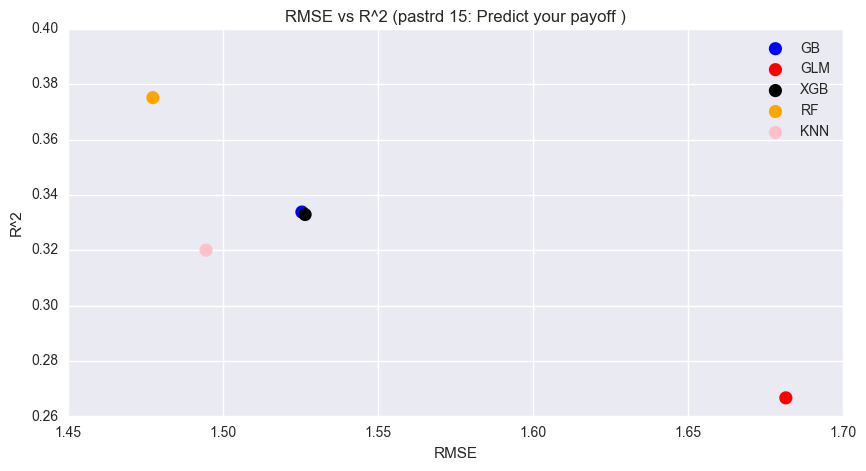

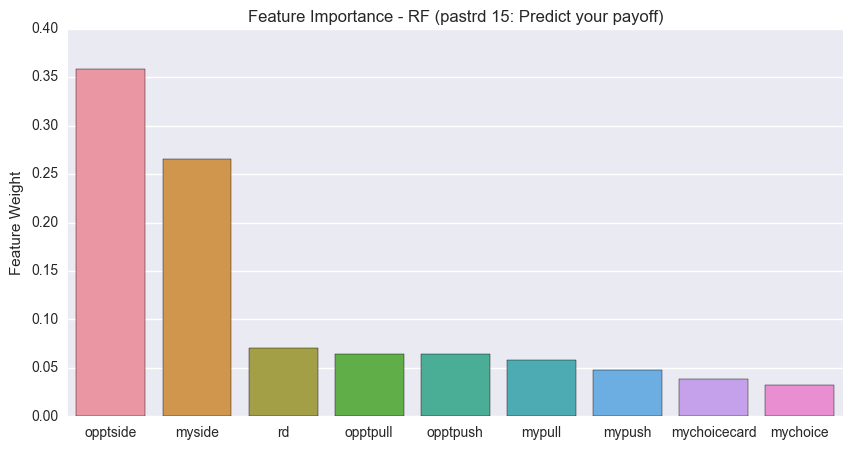

In [293]:
plt.figure(figsize=(10,5))
plt.scatter(best_gb_pastrd15_rmse,best_gb_pastrd15_r2,label='GB',color='b',linewidths=(5,5))
plt.scatter(best_glmnet_pastrd15_rmse,best_glmnet_pastrd15_r2,label='GLM',color='r',linewidths=(5,5))
plt.scatter(best_xgb_pastrd15_rmse,best_xgb_pastrd15_r2,label='XGB',color='black',linewidths=(5,5))
plt.scatter(best_rf_pastrd15_rmse,best_rf_pastrd15_r2,label='RF',color='orange',linewidths=(5,5))
plt.scatter(best_knn_pastrd15_rmse,best_knn_pastrd15_r2,label='KNN',color='pink',linewidths=(5,5))
plt.title('RMSE vs R^2 (pastrd 15: Predict your payoff )')
plt.xlabel('RMSE')
plt.ylabel('R^2')
plt.legend();


plt.figure(figsize=(10,5))
sns.barplot(x=features_weights_sorted_rf_pastrd15,y=sorted_featres_rf_pastrd15)
plt.title('Feature Importance - RF (pastrd 15: Predict your payoff)')
plt.ylabel('Feature Weight')

### Best Model
- RF is the best model in terms of both RMSE and R^2. 

- Metrics
    - Best RF RMSE :1.476556009260706
    - Best RF R^2 :37.59%
    - [('Feature:', 'opptside', 'Importance:', 0.36007987345000769), ('Feature:', 'myside', 'Importance:', 0.26219218205782691), ('Feature:', 'rd', 'Importance:', 0.073781690813196146), ('Feature:', 'opptpush', 'Importance:', 0.063461761620460522), ('Feature:', 'opptpull', 'Importance:', 0.058519938539499147), ('Feature:', 'mypull', 'Importance:', 0.057061067293727077), ('Feature:', 'mypush', 'Importance:', 0.055053622329154776), ('Feature:', 'mychoicecard', 'Importance:', 0.039009123098246556), ('Feature:', 'mychoice', 'Importance:', 0.030840740797881554)]
    
> The top three features are.
    - Opptside (how much your opponent offers you for your to push)
    - My side (How much you are willing to offer to your opponent so that they push)
    - RD
    
> This is in contrast to the first 15 rounds where the most important features where.
    - 1) mychoice:
    - 2) mychoicecard: 
    - 3) opptpush: 
    
**This means that, for rds past 15, to maximize your payments, you should see what round it is and how much the other person offers you to deploy a 'push' strategy'.In addition, we have much higher prediction accuracy (in terms of RMSE) compared to the first 15 rounds. This means it is easier to predict how much money a person will make if there is an option to make side payments.**
    

# Model  evaluation on entire dataset
- Instead of splitting into rounds, look at the entire dataset.


#### Random Forest  -Default

In [49]:

regression_model_total_mypayoff = Model_Testing_Regression(ultimatum_total_df_mypayoff_X ,ultimatum_total_df_mypayoff_y,3,\
                                                          ultimatum_Xlabels,ultimatum_ylabels)

In [50]:
# Total rows
np.shape(ultimatum_total_df_mypayoff_X)

(1920, 9)

In [51]:
regression_model_total_mypayoff.random_forest()

('RMSE Val:',
 2.2485710537331176,
 'RMSE Train:',
 1.7511535846144239,
 'RMSE TEST:',
 2.232803897200291,
 [('rd', 0.29869082651158696),
  ('opptside', 0.27266270329817871),
  ('myside', 0.13330103465044482),
  ('mychoicecard', 0.062045721230951402),
  ('mychoice', 0.060350321423785359),
  ('opptpush', 0.060184397883467876),
  ('mypull', 0.051193701706673499),
  ('mypush', 0.032797187972192811),
  ('opptpull', 0.028774105322718502)])

#### Gradient Boosting - Default

In [52]:
regression_model_total_mypayoff.gradient_boost()

('RMSE Val:',
 2.1454540373525997,
 'RMSE Train:',
 1.9642364412449245,
 'RMSE TEST:',
 2.1100317589743764,
 [('rd', 0.31456929738731004),
  ('opptside', 0.18532177892851762),
  ('myside', 0.17622212180902061),
  ('mychoicecard', 0.1496552002056202),
  ('mychoice', 0.08098985908366696),
  ('mypull', 0.030951228167119638),
  ('mypush', 0.022735282559143574),
  ('opptpush', 0.021579437309232591),
  ('opptpull', 0.017975794550368934)])

#### Extreme Gradient Boosting - Default

In [53]:
regression_model_total_mypayoff.extreme_gradient_boost()

('RMSE Val:',
 2.1870060407181566,
 'RMSE Train:',
 1.9554370900937841,
 'RMSE TEST:',
 2.0766922040560547,
 [('rd', 0.34768245),
  ('opptside', 0.19723815),
  ('myside', 0.19722031),
  ('mychoice', 0.10937022),
  ('mypush', 0.088319413),
  ('mychoicecard', 0.060169488),
  ('opptpull', 0.0),
  ('opptpush', 0.0),
  ('mypull', 0.0)])

#### GLM/Elastic net - Default

In [54]:
regression_model_total_mypayoff_scaled = Model_Testing_Regression( ultimatum_total_df_mypayoff_X_scaled  ,ultimatum_total_df_mypayoff_y,3,\
                                                          ultimatum_Xlabels,ultimatum_ylabels)

In [55]:
regression_model_total_mypayoff_scaled.glm_net()

('RMSE Val:',
 2.4704866668896304,
 'RMSE Train:',
 2.4658982092638739,
 'RMSE TEST:',
 2.4727223478725109,
 [('opptside', 0.1083492117925859),
  ('mypull', 0.081618700839367217),
  ('opptpush', 0.081611159519030654),
  ('mypush', 0.081606972511165943),
  ('opptpull', 0.081600486358729352),
  ('mychoicecard', 0.0),
  ('mychoice', 0.0),
  ('myside', 0.0),
  ('rd', 0.0)])

#### KNNregression - default

In [56]:
regression_model_total_mypayoff_scaled.knn_regression()

('RMSE Val:',
 2.2165651744982497,
 'RMSE Train:',
 1.9125493198056673,
 'RMSE TEST:',
 2.4823607754097496)

## Gridsearch to find the best parameters
- Max tree depth is ~10 (log2(samples))
- Learning rate .001 to 2.0
- N_estimators for trees should asymptote after 1,000
- Max features (how many features to consider for making a split)
- L1 ratio (how much L1 vs L2 penalty to give- range .0001 to 1.0 ). For GLM/Elastic net. 
- KNN: number of neighbors

In [57]:
extreme_gradient_boost_parameters = {'max_depth':[i for i in range(1,10)], 'learning_rate':[i for i in np.linspace(.001,2.0,50)],
                                     'n_estimators':[i for i in range(50,1000,10)],
                                     'reg_alpha':[i for i in np.linspace(.001,5.0,50)],
                                     'reg_lambda':[i for i in np.linspace(.001,5.0,50)]
}
random_forest_parameters = {'n_estimators':[i for i in range(1,500)],'max_depth':[i for i in range(1,10)],\
                            'max_features':['auto','sqrt','log2']}
gradient_boost_parameters = {'loss':['ls', 'lad', 'huber', 'quantile'], 'learning_rate':[i for i in np.linspace(.001,2.0,50)],\
                            'n_estimators':[i for i in range(50,1000,10)],\
                            'max_depth':[i for i in range(1,10)],'subsample':[i for i in np.linspace(.001,1,30)],\
                              'alpha':[i for i in np.linspace(.001,.99,30)],'max_features':['auto','sqrt','log2']}
glm_net_parameters = {'alpha':[i for i in np.linspace(.001,2.99,30)],'l1_ratio':[i for i in np.linspace(.001,1.0,100)]  
}
knn_parameters = {'n_neighbors':[i for i in range(1,100)]}


#### Random Forest  - Grid Search

In [58]:
best_rf_total_model = regression_model_total_mypayoff.random_grid_search(model='random_forest',params_dict=random_forest_parameters)




Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.7min finished


In [78]:
  #best model for scaled adata RF
regression_model_total_mypayoff_scaled.random_grid_search(model='random_forest',params_dict=random_forest_parameters,iterations=100)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  2.3min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=424, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [59]:
#Best Random Forest Model
best_rf_total_mypayoff = best_rf_total_model

# Use same data partion that is saved in your class
X_train_total_mypayoff = regression_model_total_mypayoff.X_trainval
y_train_total_mypayoff = regression_model_total_mypayoff.y_trainval
y_test_total_mypayoff = regression_model_total_mypayoff.y_test
X_test_total_mypayoff = regression_model_total_mypayoff.X_test

best_rf_total_mypayoff.fit( X_train_total_mypayoff, y_train_total_mypayoff)

best_rf_total_rmse=euclidean(y_test_total_mypayoff,best_rf_total_mypayoff.predict(X_test_total_mypayoff))/sqrt(len(y_test_total_mypayoff))
print('Best RF RMSE :{}'.format(best_rf_total_rmse))
print()
best_rf_total_r2 = r2_score(y_test_total_mypayoff,best_rf_total_mypayoff.predict(X_test_total_mypayoff))
print('Best RF R^2 :{:.2%}'.format(r2_score(y_test_total_mypayoff,best_rf_total_mypayoff.predict(X_test_total_mypayoff))))
print()
print([('Feature:',i,'Importance:',f)\
for f,i in zip(best_rf_total_mypayoff.feature_importances_[np.argsort(best_rf_total_mypayoff.feature_importances_)[::-1]],\
    regression_model_total_mypayoff.x_labels[np.argsort(best_rf_total_mypayoff.feature_importances_)[::-1]])])

abs_features_rf_total = best_rf_total_mypayoff.feature_importances_
sorted_fetures_rf_total = best_rf_total_mypayoff.feature_importances_[np.argsort(best_rf_total_mypayoff.feature_importances_)[::-1]]
features_weights_sorted_rf_total = regression_model_total_mypayoff.x_labels[np.argsort(best_rf_total_mypayoff.feature_importances_)[::-1]]

Best RF RMSE :2.069208444284043

Best RF R^2 :37.89%

[('Feature:', 'opptside', 'Importance:', 0.27456888947751357), ('Feature:', 'rd', 'Importance:', 0.1431370132800226), ('Feature:', 'myside', 'Importance:', 0.14233014327798665), ('Feature:', 'mychoicecard', 'Importance:', 0.087211834630091675), ('Feature:', 'mychoice', 'Importance:', 0.084133735243105898), ('Feature:', 'opptpull', 'Importance:', 0.07980099723669265), ('Feature:', 'mypull', 'Importance:', 0.073218820562155396), ('Feature:', 'mypush', 'Importance:', 0.060976721053409233), ('Feature:', 'opptpush', 'Importance:', 0.05462184523902238)]


In [60]:
# save the model to disk
filename = 'rf_total.sav'
joblib.dump(best_rf_total_mypayoff, filename)

['rf_total.sav']

#### Gradient Boost - Grid Search

In [61]:
best_gb_total_model = regression_model_total_mypayoff.random_grid_search(model='gradient_boost',params_dict=gradient_boost_parameters)




Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  3.5min finished


In [79]:
    ## find best model for scaled data
    regression_model_total_mypayoff_scaled.random_grid_search(model='gradient_boost',params_dict=gradient_boost_parameters,iterations=100)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  4.2min finished


GradientBoostingRegressor(alpha=0.88768965517241383, criterion='friedman_mse',
             init=None, learning_rate=0.041795918367346939, loss='huber',
             max_depth=5, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=880, presort='auto', random_state=None,
             subsample=0.20768965517241378, verbose=0, warm_start=False)

In [62]:
#Best Gradient Boost Model
best_gb_total_mypayoff = best_gb_total_model

# Use same data partion that is saved in your class
X_train_total_mypayoff = regression_model_total_mypayoff.X_trainval
y_train_total_mypayoff = regression_model_total_mypayoff.y_trainval
y_test_total_mypayoff = regression_model_total_mypayoff.y_test
X_test_total_mypayoff = regression_model_total_mypayoff.X_test

best_gb_total_mypayoff.fit( X_train_total_mypayoff, y_train_total_mypayoff)

best_gb_total_rmse=euclidean(y_test_total_mypayoff,best_gb_total_mypayoff.predict(X_test_total_mypayoff))/sqrt(len(y_test_total_mypayoff))
print('Best GB RMSE :{}'.format(best_gb_total_rmse))
print()
best_gb_total_r2 = r2_score(y_test_total_mypayoff,best_gb_total_mypayoff.predict(X_test_total_mypayoff))
print('Best GB R^2 :{:.2%}'.format(r2_score(y_test_total_mypayoff,best_gb_total_mypayoff.predict(X_test_total_mypayoff))))
print()
print([('Feature:',i,'Importance:',f)\
for f,i in zip(best_gb_total_mypayoff.feature_importances_[np.argsort(best_gb_total_mypayoff.feature_importances_)[::-1]],\
    regression_model_total_mypayoff.x_labels[np.argsort(best_gb_total_mypayoff.feature_importances_)[::-1]])])



Best GB RMSE :2.106205691305343

Best GB R^2 :35.64%

[('Feature:', 'rd', 'Importance:', 0.48893429522198539), ('Feature:', 'mychoicecard', 'Importance:', 0.1226885108803808), ('Feature:', 'opptside', 'Importance:', 0.11300710542790376), ('Feature:', 'myside', 'Importance:', 0.091956703807567722), ('Feature:', 'mychoice', 'Importance:', 0.062814165718030945), ('Feature:', 'mypush', 'Importance:', 0.042934541107702284), ('Feature:', 'mypull', 'Importance:', 0.029116730194134181), ('Feature:', 'opptpush', 'Importance:', 0.028358401536590899), ('Feature:', 'opptpull', 'Importance:', 0.020189546105704156)]


In [63]:
# save the model to disk
filename = 'gb_total.sav'
joblib.dump(best_gb_total_mypayoff, filename)

['gb_total.sav']

#### Extreme Gradient Boost - Grid Search

In [64]:
best_xgb_total_model = regression_model_total_mypayoff.random_grid_search(model='extreme_gradient_boost',params_dict=extreme_gradient_boost_parameters)




Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   47.1s finished


In [80]:
### find the bes EGB on scaled data
regression_model_total_mypayoff_scaled.random_grid_search(model='extreme_gradient_boost',params_dict=extreme_gradient_boost_parameters,iterations=100)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   38.4s finished


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.16418367346938775, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=890, nthread=-1,
       objective='reg:linear', reg_alpha=3.163632653061224,
       reg_lambda=0.40908163265306119, scale_pos_weight=1, seed=0,
       silent=True, subsample=1)

In [65]:
#BestExtreme Gradient Boost Model
best_xgb_total_mypayoff = best_xgb_total_model

# Use same data partion that is saved in your class
X_train_total_mypayoff = regression_model_total_mypayoff.X_trainval
y_train_total_mypayoff = regression_model_total_mypayoff.y_trainval
y_test_total_mypayoff = regression_model_total_mypayoff.y_test
X_test_total_mypayoff = regression_model_total_mypayoff.X_test

best_xgb_total_mypayoff.fit( X_train_total_mypayoff, y_train_total_mypayoff)

best_xgb_total_rmse=euclidean(y_test_total_mypayoff,best_xgb_total_mypayoff.predict(X_test_total_mypayoff))/sqrt(len(y_test_total_mypayoff))
print('Best XGB RMSE :{}'.format(best_xgb_total_rmse))
print()
best_xgb_total_r2 = r2_score(y_test_total_mypayoff,best_xgb_total_mypayoff.predict(X_test_total_mypayoff))
print('Best XGB R^2 :{:.2%}'.format(r2_score(y_test_total_mypayoff,best_gb_total_mypayoff.predict(X_test_total_mypayoff))))
print()
print([('Feature:',i,'Importance:',f)\
for f,i in zip(best_xgb_total_mypayoff.feature_importances_[np.argsort(best_xgb_total_mypayoff.feature_importances_)[::-1]],\
    regression_model_total_mypayoff.x_labels[np.argsort(best_xgb_total_mypayoff.feature_importances_)[::-1]])])



Best XGB RMSE :2.077339427646283

Best XGB R^2 :35.64%

[('Feature:', 'rd', 'Importance:', 0.32249323), ('Feature:', 'opptside', 'Importance:', 0.22764228), ('Feature:', 'myside', 'Importance:', 0.21680216), ('Feature:', 'mychoice', 'Importance:', 0.10569106), ('Feature:', 'mychoicecard', 'Importance:', 0.067750677), ('Feature:', 'mypush', 'Importance:', 0.059620596), ('Feature:', 'opptpull', 'Importance:', 0.0), ('Feature:', 'opptpush', 'Importance:', 0.0), ('Feature:', 'mypull', 'Importance:', 0.0)]


In [66]:
# save the model to disk
filename = 'xgb_total.sav'
joblib.dump(best_xgb_total_mypayoff, filename)

['xgb_total.sav']

#### GLEM/Elastic Net - Gridsearch

In [67]:
best_glm_total_model = regression_model_total_mypayoff_scaled.random_grid_search(model='glm_net',params_dict=glm_net_parameters,iterations=1000)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: Conv

In [68]:
# Best elastic net/glm net

best_glmnet_total_mypayoff = best_glm_total_model

# Use same data partion that is saved in your class
X_train_total_mypayoff_scaled = regression_model_total_mypayoff_scaled.X_trainval
y_train_total_mypayoff_notscaled = regression_model_total_mypayoff_scaled.y_trainval
X_test_total_mypayoff_scaled = regression_model_total_mypayoff_scaled.X_test
y_test_total_mypayoff_notscaled = regression_model_total_mypayoff_scaled.y_test

best_glmnet_total_mypayoff.fit( X_train_total_mypayoff_scaled, y_train_total_mypayoff_notscaled)

best_glmnet_total_rmse=euclidean(y_test_total_mypayoff_notscaled,\
best_glmnet_total_mypayoff.predict(X_test_total_mypayoff_scaled))/sqrt(len(y_test_total_mypayoff_notscaled))
print('Best GLMnet/Elastic Net RMSE :{}'.format(best_glmnet_total_rmse))
print()
best_glmnet_total_r2=r2_score(y_test_total_mypayoff_notscaled,\
best_glmnet_total_mypayoff.predict(X_test_total_mypayoff_scaled))
print('Best R^2 score {:.2%}'.format(r2_score(y_test_total_mypayoff_notscaled,\
best_glmnet_total_mypayoff.predict(X_test_total_mypayoff_scaled))))
print()
print([('Feature:',i,'Importance:',abs(f))\
for f,i in zip(best_glmnet_total_mypayoff.coef_[np.argsort(abs(best_glmnet_total_mypayoff.coef_))[::-1]],\
    regression_model_total_mypayoff.x_labels[np.argsort(abs(best_glmnet_total_mypayoff.coef_))[::-1]])])

Best GLMnet/Elastic Net RMSE :2.3770615772044685

Best R^2 score 15.21%

[('Feature:', 'mychoice', 'Importance:', 1.1675313571320929), ('Feature:', 'opptside', 'Importance:', 1.0661653928633026), ('Feature:', 'mychoicecard', 'Importance:', 0.55671664447680036), ('Feature:', 'mypush', 'Importance:', 0.2922211401370875), ('Feature:', 'mypull', 'Importance:', 0.28003503364596027), ('Feature:', 'opptpush', 'Importance:', 0.13783248583547827), ('Feature:', 'myside', 'Importance:', 0.13366895041136787), ('Feature:', 'rd', 'Importance:', 0.08085553109161786), ('Feature:', 'opptpull', 'Importance:', 0.045443226776990954)]


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [69]:
# save the model to disk
filename = 'glm_total.sav'
joblib.dump(best_glmnet_total_mypayoff, filename)

['glm_total.sav']

#### KNN - Grid Search

In [70]:
best_knn_total_model = regression_model_total_mypayoff_scaled.random_grid_search(model='knn_regression',params_dict=knn_parameters,iterations=50)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    5.2s finished


In [71]:
# Best elastic net/glm net

best_knn_total_mypayoff = best_knn_total_model

# Use same data partion that is saved in your class
X_train_total_mypayoff_scaled = regression_model_total_mypayoff_scaled.X_trainval
y_train_total_mypayoff_notscaled = regression_model_total_mypayoff_scaled.y_trainval
X_test_total_mypayoff_scaled = regression_model_total_mypayoff_scaled.X_test
y_test_total_mypayoff_notscaled = regression_model_total_mypayoff_scaled.y_test

best_knn_total_mypayoff.fit( X_train_total_mypayoff_scaled, y_train_total_mypayoff_notscaled)

best_knn_total_rmse=euclidean(y_test_total_mypayoff_notscaled,\
best_knn_total_mypayoff.predict(X_test_total_mypayoff_scaled))/sqrt(len(y_test_total_mypayoff_notscaled))
print('Best GLMnet/Elastic Net RMSE :{}'.format(best_knn_total_rmse))
print()
best_knn_total_r2=r2_score(y_test_total_mypayoff_notscaled,\
best_knn_total_mypayoff.predict(X_test_total_mypayoff_scaled))
print('Best R^2 score {:.2%}'.format(r2_score(y_test_total_mypayoff_notscaled,\
best_knn_total_mypayoff.predict(X_test_total_mypayoff_scaled))))


Best GLMnet/Elastic Net RMSE :2.371250442028024

Best R^2 score 15.62%


In [72]:
best_knn_total_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=19, p=2,
          weights='uniform')

In [73]:
# save the model to disk
filename = 'knn_total.sav'
joblib.dump(best_knn_total_mypayoff, filename)

['knn_total.sav']

- The optimal number of neighbors has increased significantly(~11 for the first 15 rounds) due to the additional features in the space.

# Best Model - Predict your payoff - All rds

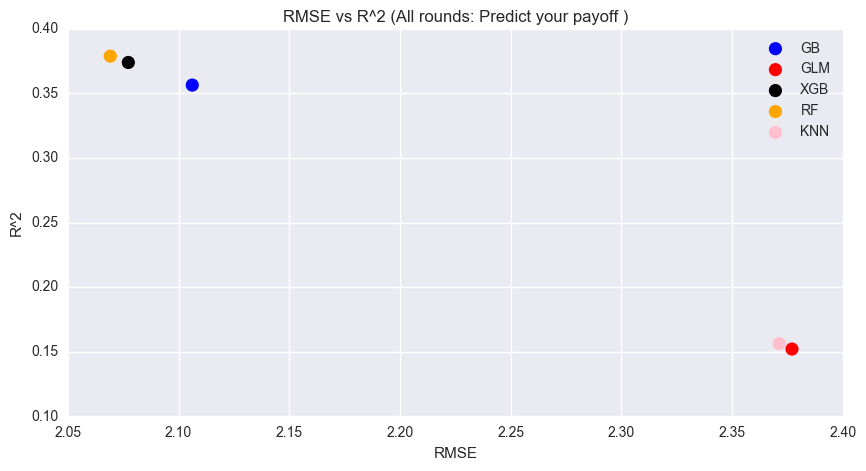

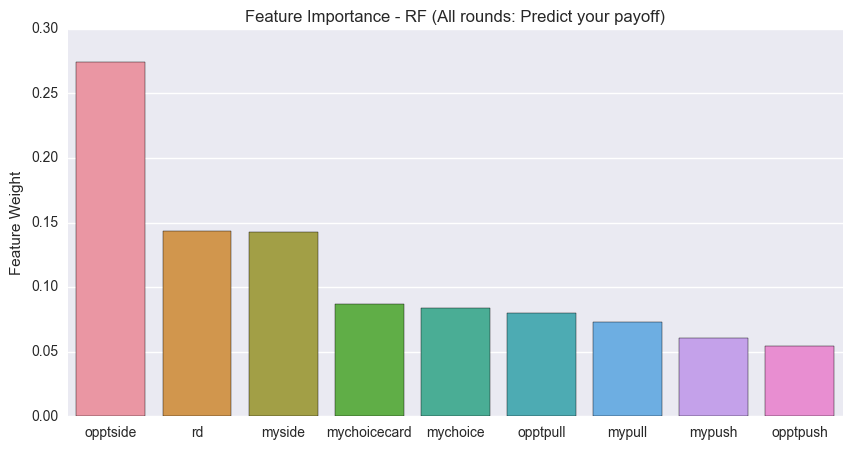

In [74]:
plt.figure(figsize=(10,5))
plt.scatter(best_gb_total_rmse,best_gb_total_r2,label='GB',color='b',linewidths=(5,5))
plt.scatter(best_glmnet_total_rmse,best_glmnet_total_r2,label='GLM',color='r',linewidths=(5,5))
plt.scatter(best_xgb_total_rmse,best_xgb_total_r2,label='XGB',color='black',linewidths=(5,5))
plt.scatter(best_rf_total_rmse,best_rf_total_r2,label='RF',color='orange',linewidths=(5,5))
plt.scatter(best_knn_total_rmse,best_knn_total_r2,label='KNN',color='pink',linewidths=(5,5))
plt.title('RMSE vs R^2 (All rounds: Predict your payoff )')
plt.xlabel('RMSE')
plt.ylabel('R^2')
plt.legend();


plt.figure(figsize=(10,5))
sns.barplot(x=features_weights_sorted_rf_total,y=sorted_fetures_rf_total)
plt.title('Feature Importance - RF (All rounds: Predict your payoff)')
plt.ylabel('Feature Weight')

> RF is our best model here.
    - Best RF RMSE :2.110143138658664
    - Best RF R^2 :30.73%
    - [('Feature:', 'opptside', 'Importance:', 0.28542931098930774), ('Feature:', 'rd', 'Importance:', 0.1376678115988714), ('Feature:', 'myside', 'Importance:', 0.1246721869788433), ('Feature:', 'mychoice', 'Importance:', 0.097811506193524439), ('Feature:', 'mychoicecard', 'Importance:', 0.091573380763219789), ('Feature:', 'mypull', 'Importance:', 0.070510596637193765), ('Feature:', 'mypush', 'Importance:', 0.068379197702283678), ('Feature:', 'opptpush', 'Importance:', 0.063002422998267624), ('Feature:', 'opptpull', 'Importance:', 0.060953586138488204)]
    - The features importances for the top three stay the same. However, rd tops my side as the second most important factor to predict your payoff over all rounds.
        - This means that after seeing how much a player has offered you to ‘push’ (opptside), the next feature to investigate is the rd. In later rounds, players have learned how to cooperate with each other to achieve a maximum payout.



# Ensemble Method
- Inspiration http://stats.stackexchange.com/questions/139042/ensemble-of-different-kinds-of-regressors-using-scikit-learn-or-any-other-pytho
- For the first 15 rounds, GLM/Elastic net/ KNN performs the best.
- For rounds past 15, and all rounds, RF  performs the best.
- Use a linear classifier on the trained models to ensemble them. Then, use  a random forest model to combine the predictions from each original model as well as the original features.
- Predictions are based on a train test split (single split).
- FOr linear ensemble, we are taking the predictions from each model and combining them into a lienar model.
    - KNN and GLM use scaled data her. All other models use unscaled data
- For the GB meta learner, we are combining the original features, scaled, with the predictions from each model

In [81]:
#### M0del predictions - GLM/Elastic net
glmnet_predictions_scaled_train = \
regression_model_total_mypayoff_scaled.predict(model='glm_net',data='train').reshape(-1,1)
glmnet_predictions_scaled_test = \
regression_model_total_mypayoff_scaled.predict(model='glm_net',data='test').reshape(-1,1)
### gradient Boost
gradient_boost_predictions_train =\
regression_model_total_mypayoff_scaled.predict(model='gradient_boost',data='train').reshape(-1,1)
gradient_boost_predictions_test =\
regression_model_total_mypayoff_scaled.predict(model='gradient_boost',data='test').reshape(-1,1)
### XGB
extreme_gradient_boost_predictions_train =\
regression_model_total_mypayoff_scaled.predict('extreme_gradient_boost',data='train').reshape(-1,1)
extreme_gradient_boost_predictions_test =\
regression_model_total_mypayoff_scaled.predict('extreme_gradient_boost',data='test').reshape(-1,1)
### Random Forest
random_forest_predictions_train =\
regression_model_total_mypayoff_scaled.predict(model='random_forest',data='train').reshape(-1,1)
random_forest_predictions_test =\
regression_model_total_mypayoff_scaled.predict(model='random_forest',data='test').reshape(-1,1)
## KNN
knn_predictions_train =\
regression_model_total_mypayoff_scaled.predict(model='knn_regression',data='train').reshape(-1,1)
knn_predictions_test =\
regression_model_total_mypayoff_scaled.predict(model='knn_regression',data='test').reshape(-1,1)


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [83]:
np.shape(regression_model_total_mypayoff_scaled.X_trainval)

(1536, 9)

In [112]:
regression_model_total_mypayoff_scaled.x_labels

array(['rd', 'myside', 'opptside', 'mypush', 'mypull', 'opptpush',
       'opptpull', 'mychoice', 'mychoicecard'], 
      dtype='<U12')

In [135]:
scale_col = StandardScaler()

In [208]:
predictions_df = pd.DataFrame(index=range(len(glmnet_predictions_scaled_train)))
predictions_df['GLM_scaled_train']=glmnet_predictions_scaled_train
predictions_df['GB_train']=gradient_boost_predictions_train
predictions_df['RF_train']=random_forest_predictions_train
predictions_df['XGB_train']=extreme_gradient_boost_predictions_train
predictions_df['KNN_train']=knn_predictions_train
original_features_train_df = pd.DataFrame(data=regression_model_total_mypayoff_scaled.X_trainval,\
                columns=['rd', 'myside', 'opptside', 'mypush', 'mypull', 'opptpush', 'opptpull','mychoice', 'mychoicecard'])
predictions_df['actual_training']=regression_model_total_mypayoff_scaled.y_trainval
final_predictions_df=pd.concat([original_features_train_df,predictions_df],axis=1)

### test df
test_predictions_df = pd.DataFrame(index=range(len(glmnet_predictions_scaled_test)))
test_predictions_df['GLM_scaled_test']=glmnet_predictions_scaled_test
test_predictions_df['GB_test']=gradient_boost_predictions_test
test_predictions_df['RF_test']=random_forest_predictions_test
test_predictions_df['XGB_test']=extreme_gradient_boost_predictions_test
test_predictions_df['KNN_test']=knn_predictions_test
test_predictions_df['actual_test']=regression_model_total_mypayoff_scaled.y_test

original_features_test_df = pd.DataFrame(data=regression_model_total_mypayoff_scaled.X_test,\
                columns=['rd', 'myside', 'opptside', 'mypush', 'mypull', 'opptpush', 'opptpull','mychoice', 'mychoicecard'])

final_predictions_test_df=pd.concat([original_features_test_df,test_predictions_df],axis=1)

In [209]:
final_predictions_df.head()

,rd,myside,opptside,mypush,mypull,opptpush,opptpull,mychoice,mychoicecard,GLM_scaled_train,GB_train,RF_train,XGB_train,KNN_train,actual_training
0,0.909611,0.447302,0.940594,1.0,-1.0,-1.0,1.0,1.193416,1.390238,4.286339,4.798382,4.658551,4.725834,4.578947,7
1,0.736352,-1.032572,0.447302,1.0,-1.0,-1.0,1.0,-0.837931,-1.156763,4.925934,3.080503,3.141530,3.244496,3.315789,3
2,1.689278,0.940594,0.447302,-1.0,1.0,1.0,-1.0,-0.837931,-0.520013,6.450687,6.811606,6.441926,6.716560,6.578947,7
3,-1.342759,-1.032572,-1.032572,1.0,-1.0,-1.0,1.0,-0.837931,-1.156763,3.516251,3.287250,3.685004,3.705316,3.315789,3
4,-0.996241,-1.032572,-1.032572,1.0,-1.0,-1.0,1.0,-0.837931,-1.156763,3.488233,3.027767,3.863704,4.026958,3.947368,3


In [210]:
final_predictions_df.columns

Index(['rd', 'myside', 'opptside', 'mypush', 'mypull', 'opptpush', 'opptpull',
       'mychoice', 'mychoicecard', 'GLM_scaled_train', 'GB_train', 'RF_train',
       'XGB_train', 'KNN_train', 'actual_training'],
      dtype='object')

In [211]:
final_predictions_test_df.columns

Index(['rd', 'myside', 'opptside', 'mypush', 'mypull', 'opptpush', 'opptpull',
       'mychoice', 'mychoicecard', 'GLM_scaled_test', 'GB_test', 'RF_test',
       'XGB_test', 'KNN_test', 'actual_test'],
      dtype='object')

In [212]:
final_predictions_test_df.tail()

,rd,myside,opptside,mypush,mypull,opptpush,opptpull,mychoice,mychoicecard,GLM_scaled_test,GB_test,RF_test,XGB_test,KNN_test,actual_test
379,0.303204,0.447302,-1.032572,1.0,-1.0,-1.0,1.0,-0.837931,-1.156763,3.185353,2.897160,3.528263,3.153431,3.684211,3
380,-0.129944,1.433885,0.447302,1.0,-1.0,-1.0,1.0,-0.837931,-1.156763,4.666291,3.787646,4.070703,4.054821,3.894737,4
381,-1.429389,-1.032572,-1.032572,-1.0,1.0,1.0,-1.0,-0.837931,-0.520013,5.388809,5.009441,6.041737,5.876254,5.842105,4
382,-0.649722,-1.032572,-1.032572,-1.0,1.0,1.0,-1.0,-0.837931,-0.520013,5.325769,4.787028,5.715272,5.899975,6.210526,11
383,-1.082870,-1.032572,-1.032572,1.0,-1.0,-1.0,1.0,-0.837931,-1.156763,3.495238,4.268700,3.990203,4.188051,3.947368,3


In [213]:
### verify scaled
final_predictions_df.describe()

,rd,myside,opptside,mypush,mypull,opptpush,opptpull,mychoice,mychoicecard,GLM_scaled_train,GB_train,RF_train,XGB_train,KNN_train,actual_training
count,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000
mean,0.023067,0.035263,0.019526,0.000000,0.000000,0.000000,0.000000,-0.002116,-0.006799,4.804688,4.601726,4.807052,4.804869,4.843819,4.804688
std,0.993571,1.003891,1.000536,1.000326,1.000326,1.000326,1.000326,0.999947,0.999508,1.250723,1.842546,1.626535,1.675083,1.565152,2.584772
min,-1.689278,-1.032572,-1.032572,-1.000000,-1.000000,-1.000000,-1.000000,-0.837931,-1.156763,2.155810,-0.532172,0.256467,0.392549,0.000000,0.000000
25%,-0.822981,-1.032572,-1.032572,-1.000000,-1.000000,-1.000000,-1.000000,-0.837931,-1.156763,3.712118,3.639389,3.951182,3.748494,3.947368,3.000000
50%,0.043315,-0.045989,-0.045989,0.000000,0.000000,0.000000,0.000000,-0.837931,-0.520013,4.871584,4.664171,4.670222,4.906030,4.842105,4.000000
75%,0.909611,0.940594,0.940594,1.000000,1.000000,1.000000,1.000000,1.193416,0.753488,5.427758,5.805991,6.109834,6.098392,6.105263,7.000000
max,1.689278,3.900342,3.900342,1.000000,1.000000,1.000000,1.000000,1.193416,1.390238,8.588593,13.279374,12.725321,12.472825,9.000000,13.000000


In [214]:
#verify scaled
final_predictions_test_df.describe()

,rd,myside,opptside,mypush,mypull,opptpush,opptpull,mychoice,mychoicecard,GLM_scaled_test,GB_test,RF_test,XGB_test,KNN_test,actual_test
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,-0.092270,-0.141051,-0.078104,0.000000,0.000000,0.000000,0.000000,0.008464,0.027195,4.740063,4.547340,4.744537,4.695372,4.752056,4.864583
std,1.022703,0.974185,0.996633,1.001305,1.001305,1.001305,1.001305,1.002774,1.004109,1.251696,1.848046,1.637514,1.721011,1.631574,2.584831
min,-1.689278,-1.032572,-1.032572,-1.000000,-1.000000,-1.000000,-1.000000,-0.837931,-1.156763,2.199525,-0.389074,0.564576,0.677571,0.000000,0.000000
25%,-0.909611,-1.032572,-1.032572,-1.000000,-1.000000,-1.000000,-1.000000,-0.837931,-0.520013,3.649430,3.525744,3.931376,3.748494,3.947368,3.000000
50%,-0.216574,-0.539281,-0.045989,0.000000,0.000000,0.000000,0.000000,-0.837931,-0.520013,4.823204,4.660686,4.655617,4.766048,4.789474,4.000000
75%,0.758009,0.940594,0.940594,1.000000,1.000000,1.000000,1.000000,1.193416,1.390238,5.395814,5.590137,5.942702,5.899975,6.052632,7.000000
max,1.689278,2.913759,2.913759,1.000000,1.000000,1.000000,1.000000,1.193416,1.390238,7.934406,11.678177,10.375798,10.948261,8.315789,11.000000


In [247]:
stacked_model = linear_model.LinearRegression()
stacked_model_gb =GradientBoostingRegressor()

- For our GB ensemble, find the best parameters for this training split.

In [256]:
random_search_gb_ensemble= RandomizedSearchCV(estimator=GradientBoostingRegressor(),param_distributions=gradient_boost_parameters,cv=3,n_iter=100,verbose=1)
random_search_gb_ensemble.fit(final_predictions_df[['rd', 'myside', 'opptside', 'mypush', 'mypull', 'opptpush', 'opptpull',
       'mychoice', 'mychoicecard', 'GLM_scaled_train', 'GB_train', 'RF_train',
       'XGB_train', 'KNN_train']],final_predictions_df['actual_training'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  3.9min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 58...62068965511, 0.86220689655172411, 0.89665517241379311, 0.93110344827586211, 0.965551724137931, 1.0]},
          pre_dispatch='2*n_jobs

In [258]:
stacked_model_gb = random_search_gb_ensemble.best_estimator_

- Create the first linear model with only the outputs from each model (no original features)
- The second model will be gradient boosting on the predicted values from each model as well as the original features

In [259]:
stacked_model.fit(final_predictions_df[['GLM_scaled_train','GB_train','RF_train','XGB_train','KNN_train']],\
                  final_predictions_df['actual_training'])

stacked_model_gb.fit(final_predictions_df[['rd', 'myside', 'opptside', 'mypush', 'mypull', 'opptpush', 'opptpull',
       'mychoice', 'mychoicecard', 'GLM_scaled_train', 'GB_train', 'RF_train',
       'XGB_train', 'KNN_train']],\
                  final_predictions_df['actual_training'])

GradientBoostingRegressor(alpha=0.001, criterion='friedman_mse', init=None,
             learning_rate=0.49055102040816323, loss='ls', max_depth=1,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=250, presort='auto', random_state=None,
             subsample=0.68996551724137933, verbose=0, warm_start=False)

In [260]:
##Column order = GLM_scaled , GB, RF, XGB ,KNN
stacked_model.coef_

array([-0.12448028,  0.93010836,  0.28100216, -0.07034054, -0.05362199])

In [266]:
#Columns order - 'rd', 'myside', 'opptside', 'mypush', 'mypull', 'opptpush', 'opptpull',
      # 'mychoice', 'mychoicecard', 'GLM_scaled_train', 'GB_train', 'RF_train',
      # 'XGB_train', 'KNN_train'
stacked_model_gb.feature_importances_

array([ 0.38 ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.004,  0.116,  0.204,  0.108,  0.064,  0.124])

In [262]:
linear_ensemble_rmse = \
euclidean(final_predictions_test_df.actual_test,\
stacked_model.predict(np.array(final_predictions_test_df[['GLM_scaled_test','XGB_test','GB_test','RF_test','KNN_test']])))/ sqrt(len(test_predictions_df.actual_test))
## R2
linear_ensemble_r2_score = \
r2_score(final_predictions_test_df.actual_test,\
stacked_model.predict(np.array(final_predictions_test_df[['GLM_scaled_test','XGB_test','GB_test','RF_test','KNN_test']])))

In [263]:
gb_ensemble_rmse = \
euclidean(final_predictions_test_df.actual_test,\
stacked_model_rf.predict(np.array(final_predictions_test_df[['rd', 'myside', 'opptside', 'mypush', 'mypull', 'opptpush', 'opptpull',
       'mychoice', 'mychoicecard', 'GLM_scaled_test', 'GB_test', 'RF_test',
       'XGB_test', 'KNN_test']])))/ sqrt(len(test_predictions_df.actual_test))
## R2
gb_ensemble_r2_score = \
r2_score(final_predictions_test_df.actual_test,\
stacked_model_rf.predict(np.array(final_predictions_test_df[['rd', 'myside', 'opptside', 'mypush', 'mypull', 'opptpush', 'opptpull',
       'mychoice', 'mychoicecard', 'GLM_scaled_test', 'GB_test', 'RF_test',
       'XGB_test', 'KNN_test']])))

Linear Ensemble RMSE : 2.3735259857168507
Linear Ensemble R2: 15.46%
Meta-Ensemble GB RMSE : 2.4664525647799427
Meta-Ensemble GB R2: 8.71%
RF RMSE : 2.069208444284043
RF R2 : 37.89%


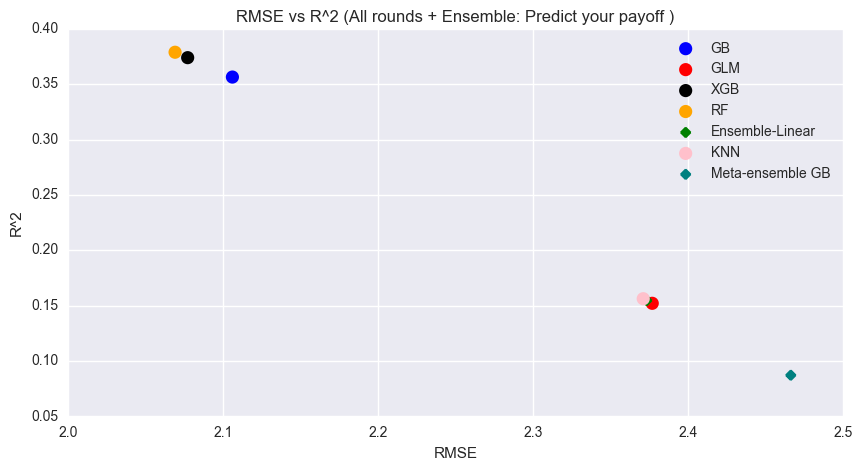

In [270]:
plt.figure(figsize=(10,5))
plt.scatter(best_gb_total_rmse,best_gb_total_r2,label='GB',color='b',linewidths=(5,5))
plt.scatter(best_glmnet_total_rmse,best_glmnet_total_r2,label='GLM',color='r',linewidths=(5,5))
plt.scatter(best_xgb_total_rmse,best_xgb_total_r2,label='XGB',color='black',linewidths=(5,5))
plt.scatter(best_rf_total_rmse,best_rf_total_r2,label='RF',color='orange',linewidths=(5,5))
plt.scatter(linear_ensemble_rmse,linear_ensemble_r2_score,label='Ensemble-Linear',color='green',marker='x',linewidths=(5,5))
plt.scatter(best_knn_total_rmse,best_knn_total_r2,label='KNN',color='pink',linewidths=(5,5))
plt.scatter(gb_ensemble_rmse,gb_ensemble_r2_score,label='Meta-ensemble GB',color='teal',marker='x',linewidths=(5,5))

plt.title('RMSE vs R^2 (All rounds + Ensemble: Predict your payoff )')
plt.xlabel('RMSE')
plt.ylabel('R^2')
plt.legend();

print("Linear Ensemble RMSE : {}".format(linear_ensemble_rmse))
print('Linear Ensemble R2: {:.2%}'.format(linear_ensemble_r2_score))
print("Meta-Ensemble GB RMSE : {}".format(gb_ensemble_rmse))
print('Meta-Ensemble GB R2: {:.2%}'.format(gb_ensemble_r2_score))
print("RF RMSE : {}".format(best_rf_total_rmse))
print('RF R2 : {:.2%}'.format(best_rf_total_r2))

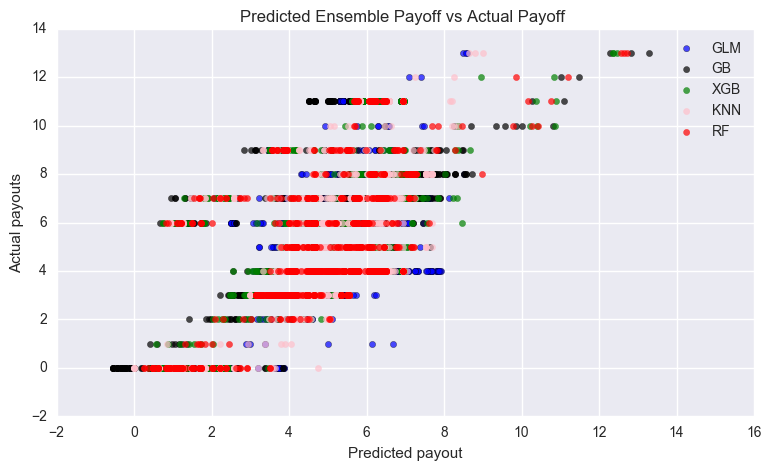

In [252]:
plt.figure(figsize=(9,5))
plt.scatter(predictions_df['GLM_scaled_train'],predictions_df['actual_training'],label='GLM',alpha=.7)
plt.scatter(predictions_df['GB_train'], predictions_df['actual_training'],color='black',label='GB',alpha=.7)
plt.scatter(predictions_df['XGB_train'],predictions_df.actual_training,color='green',label='XGB',alpha=.7)
plt.scatter(predictions_df['KNN_train'],predictions_df.actual_training,color='pink',label='KNN',alpha=.7)
plt.scatter(predictions_df['RF_train'],predictions_df.actual_training,color='red',label='RF',alpha=.7)
plt.ylabel('Actual payouts')
plt.xlabel('Predicted payout')
plt.title('Predicted Ensemble Payoff vs Actual Payoff ')
plt.legend();

## Results of ensemble method on all rounds - Predict your payoff
> The ensemble methods delivered results that were not as good as RF for all rounds. However, these results might be more robust due to the combination of models used.
> The meta-ensemble also did not deliver good results possibly due to the number of additional features used.
> Moving forward, there is most likely some features engineering, as well as additional layers of meta-learnesr, that can improve these ensemble models.


# Results
- It is the easiest to predict your payoff if you know there is going to be a side payment (past rounds 15).
- Feature importance shifts from the decision you make (pull or push) to how much the other person offers you to push.
- Playing the game more times (rd number) has a positive relationship to your payoff. This means that people are more likely to 'push' money to their opponent in later rounds (pushing money from the opponent to you always results in a higher payoff for yourself).

# Future work
- Investigate, and build out models, for predicting total payoff between both players
- Incorporate additional features, age or sex, into the model
- Add more data
- Investigate combinations of variables that results in the highest individual payoff/total payoff.